# Dane techniczne sprzƒôtu

Obliczenia zosta≈Çy wykonane na komputerze o nastƒôpujƒÖcych parametrach:

- Procesor: AMD Ryzen $7$ $4700$U ($8$ rdzeni, $8$ wƒÖtk√≥w),

- Pamiƒôƒá RAM: $16$ GB $3200$ MHz

# Biblioteki

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import random
import time
from math import sqrt

In [2]:
sns.set(rc={"figure.dpi": 200, 'savefig.dpi': 200})

# Pomocnicze funkcje

## Obliczenia

### Budowanie macierzy wype≈Çnionej zgodnie ze wzorem

#### Macierz kwadratowa

In [3]:
def create_matrix(fn, n, m, dtype=np.float64):
    A = np.empty((n, m), dtype)
    
    for i in range(n):
        for j in range(m):
            A[i, j] = fn(i + 1, j + 1)
            
    return A

### Tworzenie wektor√≥w

#### Tworzenie wektora wype≈Çnionego warto≈õciami zgodnie z zadanƒÖ funkcjƒÖ

In [4]:
def create_vector(fn, n, dtype=np.float64):
    return np.array([fn(i) for i in range(n)], dtype)

### Pomiar czasu wykonywania kodu

#### Dekorator, pozwalajƒÖcy na pomiar czasu wykonania kodu

In [5]:
def print_duration(sec):
    t = int(sec)
    ms = int((sec - t) * 1000)
    s = t % 60
    t //= 60
    m = t % 60
    t //= 60
    print(f'≈ÅƒÖczny czas wykonania: {t:>02}:{m:>02}:{s:>02}.{ms:<03}')

def timed(*, save_fn=None, save_dict=None):
    def decorator(fn):
        def inner(*args, **kwargs):
            start_time = time.perf_counter()
            res = fn(*args, **kwargs)
            duration = time.perf_counter() - start_time
    
            if save_dict is not None and save_fn: 
                save_dict[save_fn(*args, **kwargs)] = duration
            return res
        
        return inner
    return decorator

## Tworzenie wykres√≥w

### Tworzenie wykresu *Heatmap*

In [6]:
def show_heatmap(df, annot=True, norm=None, xlabel='x', ylabel='y', title='', **kwargs):
    ax = plt.figure(figsize=(15, 10))
    s = sns.heatmap(df, cmap="YlGnBu", annot=annot, norm=norm, mask=df.isnull(), **kwargs)
    s.set_xlabel(xlabel, fontsize=16)
    s.set_ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize=20, y=1.025)
    plt.show()

# Wstƒôp

Dany jest uk≈Çad r√≥wna≈Ñ liniowych $Ax=b$. 

Elementy macierzy $A$ sƒÖ zadane wzorem ($m,k$ - parametry zadania podane indywidualnie):

$
\begin{cases} 
    a_{i, i} = k \\ 
    a_{i, j} = (-1)^j \frac{m}{j} & dla & j > 1 \\
    a_{i, i-1} = \frac{m}{i} \\
    a_{i, j} = 0 & dla & j < i - 1 \\
\end{cases}
$

gdzie $k=11, m=2$

Przyjmij wektor $x$ jako dowolnƒÖ n-elementowƒÖ permutacjƒô ze zbioru $\{1, -1\}$ i oblicz wektor $b$. 

## Implementacja funkcji wyznaczajƒÖcej elementy macierzy

In [7]:
k = 11
m = 2

def fn(i, j):
    if i == j: return k
    if j > i: return (-1)**j * m / j
    if j == i - 1: return m / i
    return 0

## Tworzenie macierzy $A$

Poni≈ºsza funkcja ma jedynie na celu u≈Çatwienie tworzenia macierzy $A$ (≈ºeby za ka≈ºdym razem nie trzeba by≈Ço przekazywaƒá wszystkich parametr√≥w).

In [8]:
create_A_matrix = lambda n, dtype=np.float64: create_matrix(fn, n, n, dtype)

###### Testy

In [9]:
create_A_matrix(5)

array([[11.        ,  1.        , -0.66666667,  0.5       , -0.4       ],
       [ 1.        , 11.        , -0.66666667,  0.5       , -0.4       ],
       [ 0.        ,  0.66666667, 11.        ,  0.5       , -0.4       ],
       [ 0.        ,  0.        ,  0.5       , 11.        , -0.4       ],
       [ 0.        ,  0.        ,  0.        ,  0.4       , 11.        ]])

## Wyznaczanie wektora $x$

Poniewa≈º, jako wektor $x$, bƒôdƒÖcy rozwiƒÖzaniem uk≈Çadu r√≥wna≈Ñ $Ax=b$, mo≈ºemy przyjƒÖƒá wektor o wsp√≥≈Çrzƒôdnych, bƒôdƒÖcych dowolnƒÖ $n$-elementowƒÖ permutacjƒÖ liczb ze zbioru $\{-1, 1\}$, przyjmujƒô, ≈ºe wektor $x$ bƒôdzie postaci $[-1, 1, -1, 1, ...]$ (na przemian bƒôdƒÖ wystƒôpowa≈Çy liczby $-1$ oraz $1$, rozpoczynajƒÖc siƒô od $-1$)

In [10]:
create_x_vector = lambda n, dtype=np.float64: create_vector(lambda i: (-1)**(i + 1), n, dtype)

###### Test

In [11]:
create_x_vector(5)

array([-1.,  1., -1.,  1., -1.])

## Obliczanie wektora $b$

Poniewa≈º nie znamy wektora $b$, w celu jego obliczenia dla danego $n$, konieczne jest najpierw wyznaczenie wektora $x$, kt√≥ry ma byƒá rozwiƒÖzaniem uk≈Çadu r√≥wna≈Ñ. Nastƒôpnie, korzystajƒÖc z tego wektora, nale≈ºy obliczyƒá wektor $b$. W p√≥≈∫niejszych obliczeniach bƒôdziemy ten wektor wykorzystywaƒá wraz z macierzƒÖ $A$ do obliczenia wektora $x$, po czym, por√≥wnamy warto≈õƒá obliczonego w ten spos√≥b wektora $x$ z warto≈õciƒÖ wektora $x$ wcze≈õniej przyjƒôtego jako rozwiƒÖzanie uk≈Çadu.

In [12]:
n = 5
A = create_A_matrix(n)
x_solution = create_x_vector(n, A.dtype)
b = A @ x_solution
b

array([ -8.43333333,  11.56666667,  -9.43333333,  10.9       ,
       -10.6       ])

# Zadanie 1

## Opis zadania

MetodƒÖ Jacobiego rozwiƒÖ≈º uk≈Çad r√≥wna≈Ñ liniowych $Ax=b$ (przyjmujƒÖc jako niewiadomƒÖ wektor $x$), 
przyjmujƒÖc kolejno kryterium stopu: 

- $||x^{(i+1)} - x^{(i)}|| < \rho$

- $||Ax^{(i)} - b|| < \rho$

Obliczenia wykonaj dla r√≥≈ºnych rozmiar√≥w uk≈Çadu $n$, dla r√≥≈ºnych wektor√≥w poczƒÖtkowych, a tak≈ºe 
r√≥≈ºnych warto≈õci $\rho$ w kryteriach stopu. (*Podaj, jak liczono normƒô.*) Wyznacz liczbƒô iteracji oraz 
sprawd≈∫ r√≥≈ºnicƒô w czasie oblicze≈Ñ dla obu kryteri√≥w stopu. 
Sprawd≈∫ dok≈Çadno≈õƒá oblicze≈Ñ. 

## Kryteria stopu

### Spos√≥b obliczania normy

Przy obliczaniu kryteri√≥w stopu, wykorzysta≈Çem normƒô euklidesowƒÖ. Skorzysta≈Çem z funkcji `linalg.norm` z biblioteki `numpy`, kt√≥ra domy≈õlnie oblicza normƒô euklidesowƒÖ. Wz√≥r, opisujƒÖcy spos√≥b obliczania normy euklidesowej, ma postaƒá:

$||x|| = \sqrt{\sum_{i}^{n} x_i^2}$

### Kryteria

#### Dekorator, u≈ÇatwiajƒÖcy korzystanie z kryteri√≥w

In [13]:
def apply_function_args(fn):
    def inner(**kwargs):
        arg_names = fn.__code__.co_varnames
        return fn(**{k: kwargs[k] for k in arg_names})
    return inner

#### 1. Kryterium

$||x^{(i+1)} - x^{(i)}|| < \rho$

In [14]:
@apply_function_args
def progressive_difference(x_curr, x_next, ùúå):
    return np.linalg.norm(x_next - x_curr) < ùúå

###### Test

In [15]:
progressive_difference(
    foo=12412312,  # @apply_function_args decorator ensures that redundant parameters will be filtered out
    x_curr=np.array([3, 3, 3]),
    x_next=np.array([1, 1, 1]),
    ùúå=5.1
)

True

#### 2. Kryterium

$||Ax^{(i)} - b|| < \rho$

In [16]:
@apply_function_args
def solution_difference(x_curr, A, b, ùúå):
    return np.linalg.norm(A @ x_curr - b) < ùúå

###### Test

In [17]:
solution_difference(
    x_curr=np.array([3, 3, 3]),
    A=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
    b=np.array([1, 1, 1]),
    ùúå=123
)

True

## Wyznaczanie b≈Çƒôd√≥w oblicze≈Ñ

### Norma maksimum

Do wyznaczania b≈Çƒôd√≥w ponownie wykorzysta≈Çem normƒô euklidesowƒÖ.

In [18]:
max_err = lambda x1, x2: np.linalg.norm(x1 - x2)

###### Test

In [19]:
max_err(np.array([2, 2, 2]), np.array([1, 1, 1]))

1.7320508075688772

## Metoda Jacobiego

Umieszczony poni≈ºej s≈Çownik s≈Çu≈ºy do zapisywania czas√≥w wykonywanych oblicze≈Ñ.

In [20]:
times = {}

### Implementacja

In [21]:
@timed(
    save_fn=lambda A, *args, **kwargs: len(A),
    save_dict=times
)
def jacobi(A, b, start_vector, *, stop_criterion=progressive_difference, ùúå=1e-6, dtype=np.float64, max_iters=1000):
    n = len(A)
    D = np.diag(A)
    R = A - np.diagflat(D)
    x_curr = start_vector
    iters = 0
    
    while iters < max_iters:
        x_next = (b - (R @ x_curr)) / D
        iters += 1
        if stop_criterion(A=A, b=b, x_next=x_next, x_curr=x_curr, ùúå=ùúå): break
        x_curr = x_next
    else:
        # Return infinity if the number of iterations exceeded max_iters
        iters = float('inf')
        
    return x_next, iters

###### Testy

Jak mo≈ºemy zauwa≈ºyƒá, wyb√≥r wektora poczƒÖtkowego ma znikome znaczenie

In [22]:
n = 10
A = create_A_matrix(n)
x_solution = create_x_vector(n)
b = A @ x_solution
x_start = np.array([0] * n)

x, iters = jacobi(A, b, x_start, stop_criterion=solution_difference)
x_start, x, iters

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([-0.99999999,  1.        , -1.        ,  1.        , -1.        ,
         1.        , -1.        ,  1.        , -1.        ,  1.        ]),
 8)

## RozwiƒÖzanie

In [23]:
times.clear()

### Pomocnicza funkcja

In [24]:
@timed(
    save_fn=lambda *args, **kwargs: 'total',
    save_dict=times
)
def calculate(n_list, ùúå_list, start_vector_fn, stop_criterion, dtype=np.float64, max_iters=1000, log_every=25):
    results = {}
    
    vectors = [[None] * len(ùúå_list) for _ in range(len(n_list))]  # Calculated vectors
    errors = np.empty((len(n_list), len(ùúå_list)))
    iters = np.empty((len(n_list), len(ùúå_list)))
    times_ = np.empty((len(n_list), len(ùúå_list)))
    
    for i, n in enumerate(n_list):
        A = create_A_matrix(n, dtype)
        x_start = create_vector(start_vector_fn, n)  # Initial x vector
        x_solution = create_x_vector(n, dtype)  # Expected solution
        b = A @ x_solution

        for j, ùúå in enumerate(ùúå_list):
            x, it = jacobi(A, b, x_start, stop_criterion=stop_criterion, ùúå=ùúå, dtype=dtype, max_iters=max_iters)
            vectors[i][j] = x
            errors[i, j] = max_err(x, x_solution)
            iters[i, j] = it
            times_[i, j] = times[n]
            
        if not (i + 1) % log_every:
            print(f'Obliczono uk≈Çady r√≥wna≈Ñ dla {i + 1} warto≈õci n')
            
    if (i + 1) % log_every:
        print(f'Obliczono uk≈Çady r√≥wna≈Ñ dla {i + 1} warto≈õci n')
        
    # Save results
    for key, data in zip(
        ('vectors', 'errors', 'iters', 'times'), 
        (vectors, errors, iters, times_)
    ):
        results[key] = pd.DataFrame(data, index=n_list, columns=ùúå_list)
            
    return results

###### Testy

In [25]:
n_list = [10, 25, 100]
start_vector_fn = lambda i: random.randint(-10e10, 10e10)
ùúå_list = [
    1e-5,
    1e-10,
    1e-15
]
stop_criterion = progressive_difference

results = calculate(n_list, ùúå_list, start_vector_fn, stop_criterion)

Obliczono uk≈Çady r√≥wna≈Ñ dla 3 warto≈õci n


In [26]:
results['iters']

1.000000e-05  1.000000e-10  1.000000e-15
10           16.0          20.0          25.0
25           16.0          20.0          25.0
100          17.0          22.0          26.0

In [27]:
results['errors']

1.000000e-05  1.000000e-10  1.000000e-15
10   1.060701e-07  7.693028e-12  3.330669e-16
25   9.713560e-08  5.989250e-12  5.874748e-16
100  1.650035e-07  1.025384e-12  1.514142e-15

In [28]:
results['times']

1.000000e-05  1.000000e-10  1.000000e-15
10       0.000723      0.000430      0.000376
25       0.000298      0.000376      0.000356
100      0.003848      0.003080      0.003772

In [29]:
results['vectors']

1.000000e-05  \
10   [-1.0000000823014437, 1.0000000527081037, -1.0...   
25   [-1.0000000737738024, 1.0000000358494407, -1.0...   
100  [-1.0000001319331204, 1.0000000687807546, -1.0...   

                                          1.000000e-10  \
10   [-1.0000000000062244, 1.0000000000029972, -1.0...   
25   [-1.000000000004694, 1.0000000000027938, -1.00...   
100  [-1.0000000000008193, 1.0000000000004272, -1.0...   

                                          1.000000e-15  
10   [-1.0, 1.0000000000000002, -1.0, 1.0, -1.0, 1....  
25   [-1.0000000000000002, 1.0, -1.0, 1.0, -1.00000...  
100  [-1.0000000000000002, 1.0, -1.0, 1.00000000000...

### Dla ustalonego wektora poczƒÖtkowego oraz r√≥≈ºnych $n$ i r√≥≈ºnych $\rho$

W poni≈ºszych obliczeniach, jako wektor poczƒÖtkowy, przyjmujƒô wektor $n$-elementowy z≈Ço≈ºony z samych zer.

#### Dla 1. kryterium stopu

In [30]:
n_list = list(range(2, 501))
start_vector_fns = lambda _: 0
ùúå_list = [
    1e-1,
    1e-2,
    1e-3,
    1e-5,
    1e-10,
    1e-15
]
stop_criterion = progressive_difference

results1 = calculate(n_list, ùúå_list, start_vector_fns, stop_criterion)
print_duration(times['total'])

Obliczono uk≈Çady r√≥wna≈Ñ dla 25 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 50 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 75 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 100 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 125 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 150 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 175 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 200 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 225 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 250 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 275 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 300 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 325 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 350 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 375 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 400 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 425 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 450 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 475 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 499 warto≈õci n
≈ÅƒÖczny czas wykonania: 00:00:24.833


##### Liczby iteracji

Widzimy, ≈ºe liczba iteracji prawie siƒô nie zmienia, podczas zwiƒôkszania $n$, natomiast, zmniejszanie warto≈õci $\rho$ do≈õƒá znaczƒÖco wp≈Çywa na wzrost liczby iteracji.

In [31]:
df_iters1 = results1['iters']
df_iters1

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2             3.0           4.0           4.0           6.0          11.0   
3             3.0           4.0           5.0           6.0          11.0   
4             3.0           4.0           5.0           6.0          11.0   
5             3.0           4.0           5.0           6.0          11.0   
6             3.0           4.0           5.0           6.0          11.0   
..            ...           ...           ...           ...           ...   
496           4.0           4.0           5.0           7.0          11.0   
497           4.0           4.0           5.0           7.0          11.0   
498           4.0           4.0           5.0           7.0          11.0   
499           4.0           4.0           5.0           7.0          11.0   
500           4.0           4.0           5.0           7.0          11.0   

     1.000000e-15  
2            16.0  
3            16.0  
4            16.0  
5            16.0  
6            16.0  
..            ...  
496          16.0  
497          16.0  
498          16.0  
499          16.0  
500          16.0  

[499 rows x 6 columns]

In [79]:
min_n = 2
interval = 15
ns = [0, *range(interval - min_n, len(df_iters1), interval)]
if ns[-1] != len(df_iters1): ns.append(len(df_iters1) - 1)
df_iters1_part = df_iters1.iloc[ns]
df_iters1_part.to_excel('zad1-iters1-part.xlsx')
df_iters1_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2             3.0           4.0           4.0           6.0          11.0   
15            3.0           4.0           5.0           6.0          11.0   
30            3.0           4.0           5.0           6.0          11.0   
45            3.0           4.0           5.0           7.0          11.0   
60            3.0           4.0           5.0           7.0          11.0   
75            3.0           4.0           5.0           7.0          11.0   
90            3.0           4.0           5.0           7.0          11.0   
105           3.0           4.0           5.0           7.0          11.0   
120           3.0           4.0           5.0           7.0          11.0   
135           3.0           4.0           5.0           7.0          11.0   
150           3.0           4.0           5.0           7.0          11.0   
165           3.0           4.0           5.0           7.0          11.0   
180           3.0           4.0           5.0           7.0          11.0   
195           3.0           4.0           5.0           7.0          11.0   
210           3.0           4.0           5.0           7.0          11.0   
225           3.0           4.0           5.0           7.0          11.0   
240           3.0           4.0           5.0           7.0          11.0   
255           3.0           4.0           5.0           7.0          11.0   
270           3.0           4.0           5.0           7.0          11.0   
285           3.0           4.0           5.0           7.0          11.0   
300           3.0           4.0           5.0           7.0          11.0   
315           3.0           4.0           5.0           7.0          11.0   
330           3.0           4.0           5.0           7.0          11.0   
345           3.0           4.0           5.0           7.0          11.0   
360           3.0           4.0           5.0           7.0          11.0   
375           3.0           4.0           5.0           7.0          11.0   
390           3.0           4.0           5.0           7.0          11.0   
405           4.0           4.0           5.0           7.0          11.0   
420           4.0           4.0           5.0           7.0          11.0   
435           4.0           4.0           5.0           7.0          11.0   
450           4.0           4.0           5.0           7.0          11.0   
465           4.0           4.0           5.0           7.0          11.0   
480           4.0           4.0           5.0           7.0          11.0   
495           4.0           4.0           5.0           7.0          11.0   
500           4.0           4.0           5.0           7.0          11.0   

     1.000000e-15  
2            16.0  
15           16.0  
30           16.0  
45           16.0  
60           16.0  
75           16.0  
90           16.0  
105          16.0  
120          16.0  
135          16.0  
150          16.0  
165          16.0  
180          16.0  
195          16.0  
210          16.0  
225          16.0  
240          16.0  
255          16.0  
270          16.0  
285          16.0  
300          16.0  
315          16.0  
330          16.0  
345          16.0  
360          16.0  
375          16.0  
390          16.0  
405          16.0  
420          16.0  
435          16.0  
450          16.0  
465          16.0  
480          16.0  
495          16.0  
500          16.0

Bardzo dobrze pokazuje to poni≈ºszy wykres.

In [32]:
show_heatmap(df_iters1, xlabel='rho', ylabel='n', annot=False)

##### Czasy oblicze≈Ñ

W tym przypadku widzimy, ≈ºe czas oblicze≈Ñ zwiƒôksza siƒô zar√≥wno podczas zwiƒôkszania warto≈õci $n$, jak i podczas zmniejszania warto≈õci $\rho$.

In [33]:
df_times1 = results1['times']
df_times1

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000163      0.000088      0.000085      0.000161      0.000195   
3        0.000290      0.000383      0.000387      0.000152      0.001036   
4        0.000240      0.000112      0.000104      0.000120      0.000194   
5        0.000089      0.000085      0.000100      0.000117      0.000181   
6        0.000089      0.000091      0.000105      0.000148      0.000157   
..            ...           ...           ...           ...           ...   
496      0.002248      0.002110      0.002277      0.002754      0.002642   
497      0.002320      0.002080      0.001965      0.002511      0.003037   
498      0.002641      0.002808      0.002724      0.002687      0.004689   
499      0.002284      0.002450      0.002286      0.002683      0.003169   
500      0.002403      0.002223      0.002415      0.002756      0.003435   

     1.000000e-15  
2        0.000270  
3        0.000369  
4        0.000272  
5        0.000261  
6        0.000199  
..            ...  
496      0.003546  
497      0.003715  
498      0.005110  
499      0.004189  
500      0.003801  

[499 rows x 6 columns]

In [80]:
df_times1_part = df_times1.iloc[ns]
df_times1_part.to_excel('zad1-times1-part.xlsx')
df_times1_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000163      0.000088      0.000085      0.000161      0.000195   
15       0.000069      0.000067      0.000077      0.000087      0.000142   
30       0.000063      0.000067      0.000086      0.000287      0.000378   
45       0.000067      0.000074      0.000077      0.000102      0.000146   
60       0.000090      0.000065      0.000075      0.000098      0.000247   
75       0.000172      0.000072      0.000081      0.000108      0.000141   
90       0.000109      0.000069      0.000076      0.000094      0.000133   
105      0.000587      0.000769      0.000713      0.000922      0.001367   
120      0.000689      0.001166      0.000841      0.001132      0.001894   
135      0.000634      0.000740      0.000963      0.001142      0.001632   
150      0.000793      0.000755      0.000803      0.001132      0.001799   
165      0.000736      0.000721      0.000829      0.000959      0.001804   
180      0.000671      0.000670      0.000691      0.001011      0.001421   
195      0.000739      0.000723      0.000732      0.001149      0.001862   
210      0.000909      0.001125      0.000785      0.001223      0.001731   
225      0.000663      0.000739      0.000649      0.000847      0.001351   
240      0.001114      0.000790      0.001018      0.001319      0.001828   
255      0.000703      0.000897      0.001028      0.000850      0.001325   
270      0.001018      0.001026      0.001190      0.001366      0.001618   
285      0.001227      0.000794      0.000923      0.001298      0.001752   
300      0.001466      0.001433      0.001466      0.001885      0.002097   
315      0.001019      0.000767      0.000863      0.000932      0.001320   
330      0.001725      0.001632      0.001906      0.001796      0.002238   
345      0.001487      0.002121      0.001568      0.002065      0.003044   
360      0.001709      0.001183      0.001168      0.001331      0.001870   
375      0.001437      0.001298      0.001344      0.002206      0.002195   
390      0.001755      0.001417      0.001563      0.001883      0.002532   
405      0.001761      0.001694      0.002304      0.002616      0.003083   
420      0.001986      0.001776      0.002253      0.002498      0.002954   
435      0.001685      0.001709      0.002189      0.001648      0.001983   
450      0.002215      0.002001      0.001823      0.002393      0.003089   
465      0.001848      0.001768      0.002227      0.002640      0.003330   
480      0.002623      0.002111      0.002142      0.002875      0.003237   
495      0.003014      0.002034      0.002029      0.002605      0.003597   
500      0.002403      0.002223      0.002415      0.002756      0.003435   

     1.000000e-15  
2        0.000270  
15       0.000197  
30       0.000228  
45       0.000204  
60       0.000206  
75       0.000191  
90       0.000201  
105      0.001847  
120      0.002433  
135      0.002463  
150      0.002631  
165      0.002529  
180      0.002302  
195      0.002686  
210      0.002243  
225      0.002553  
240      0.002487  
255      0.001781  
270      0.003012  
285      0.002460  
300      0.003225  
315      0.002199  
330      0.002504  
345      0.003074  
360      0.001896  
375      0.002416  
390      0.002464  
405      0.003530  
420      0.003499  
435      0.003382  
450      0.003187  
465      0.003322  
480      0.003216  
495      0.004058  
500      0.003801

###### Wykres czas√≥w w skali liniowej

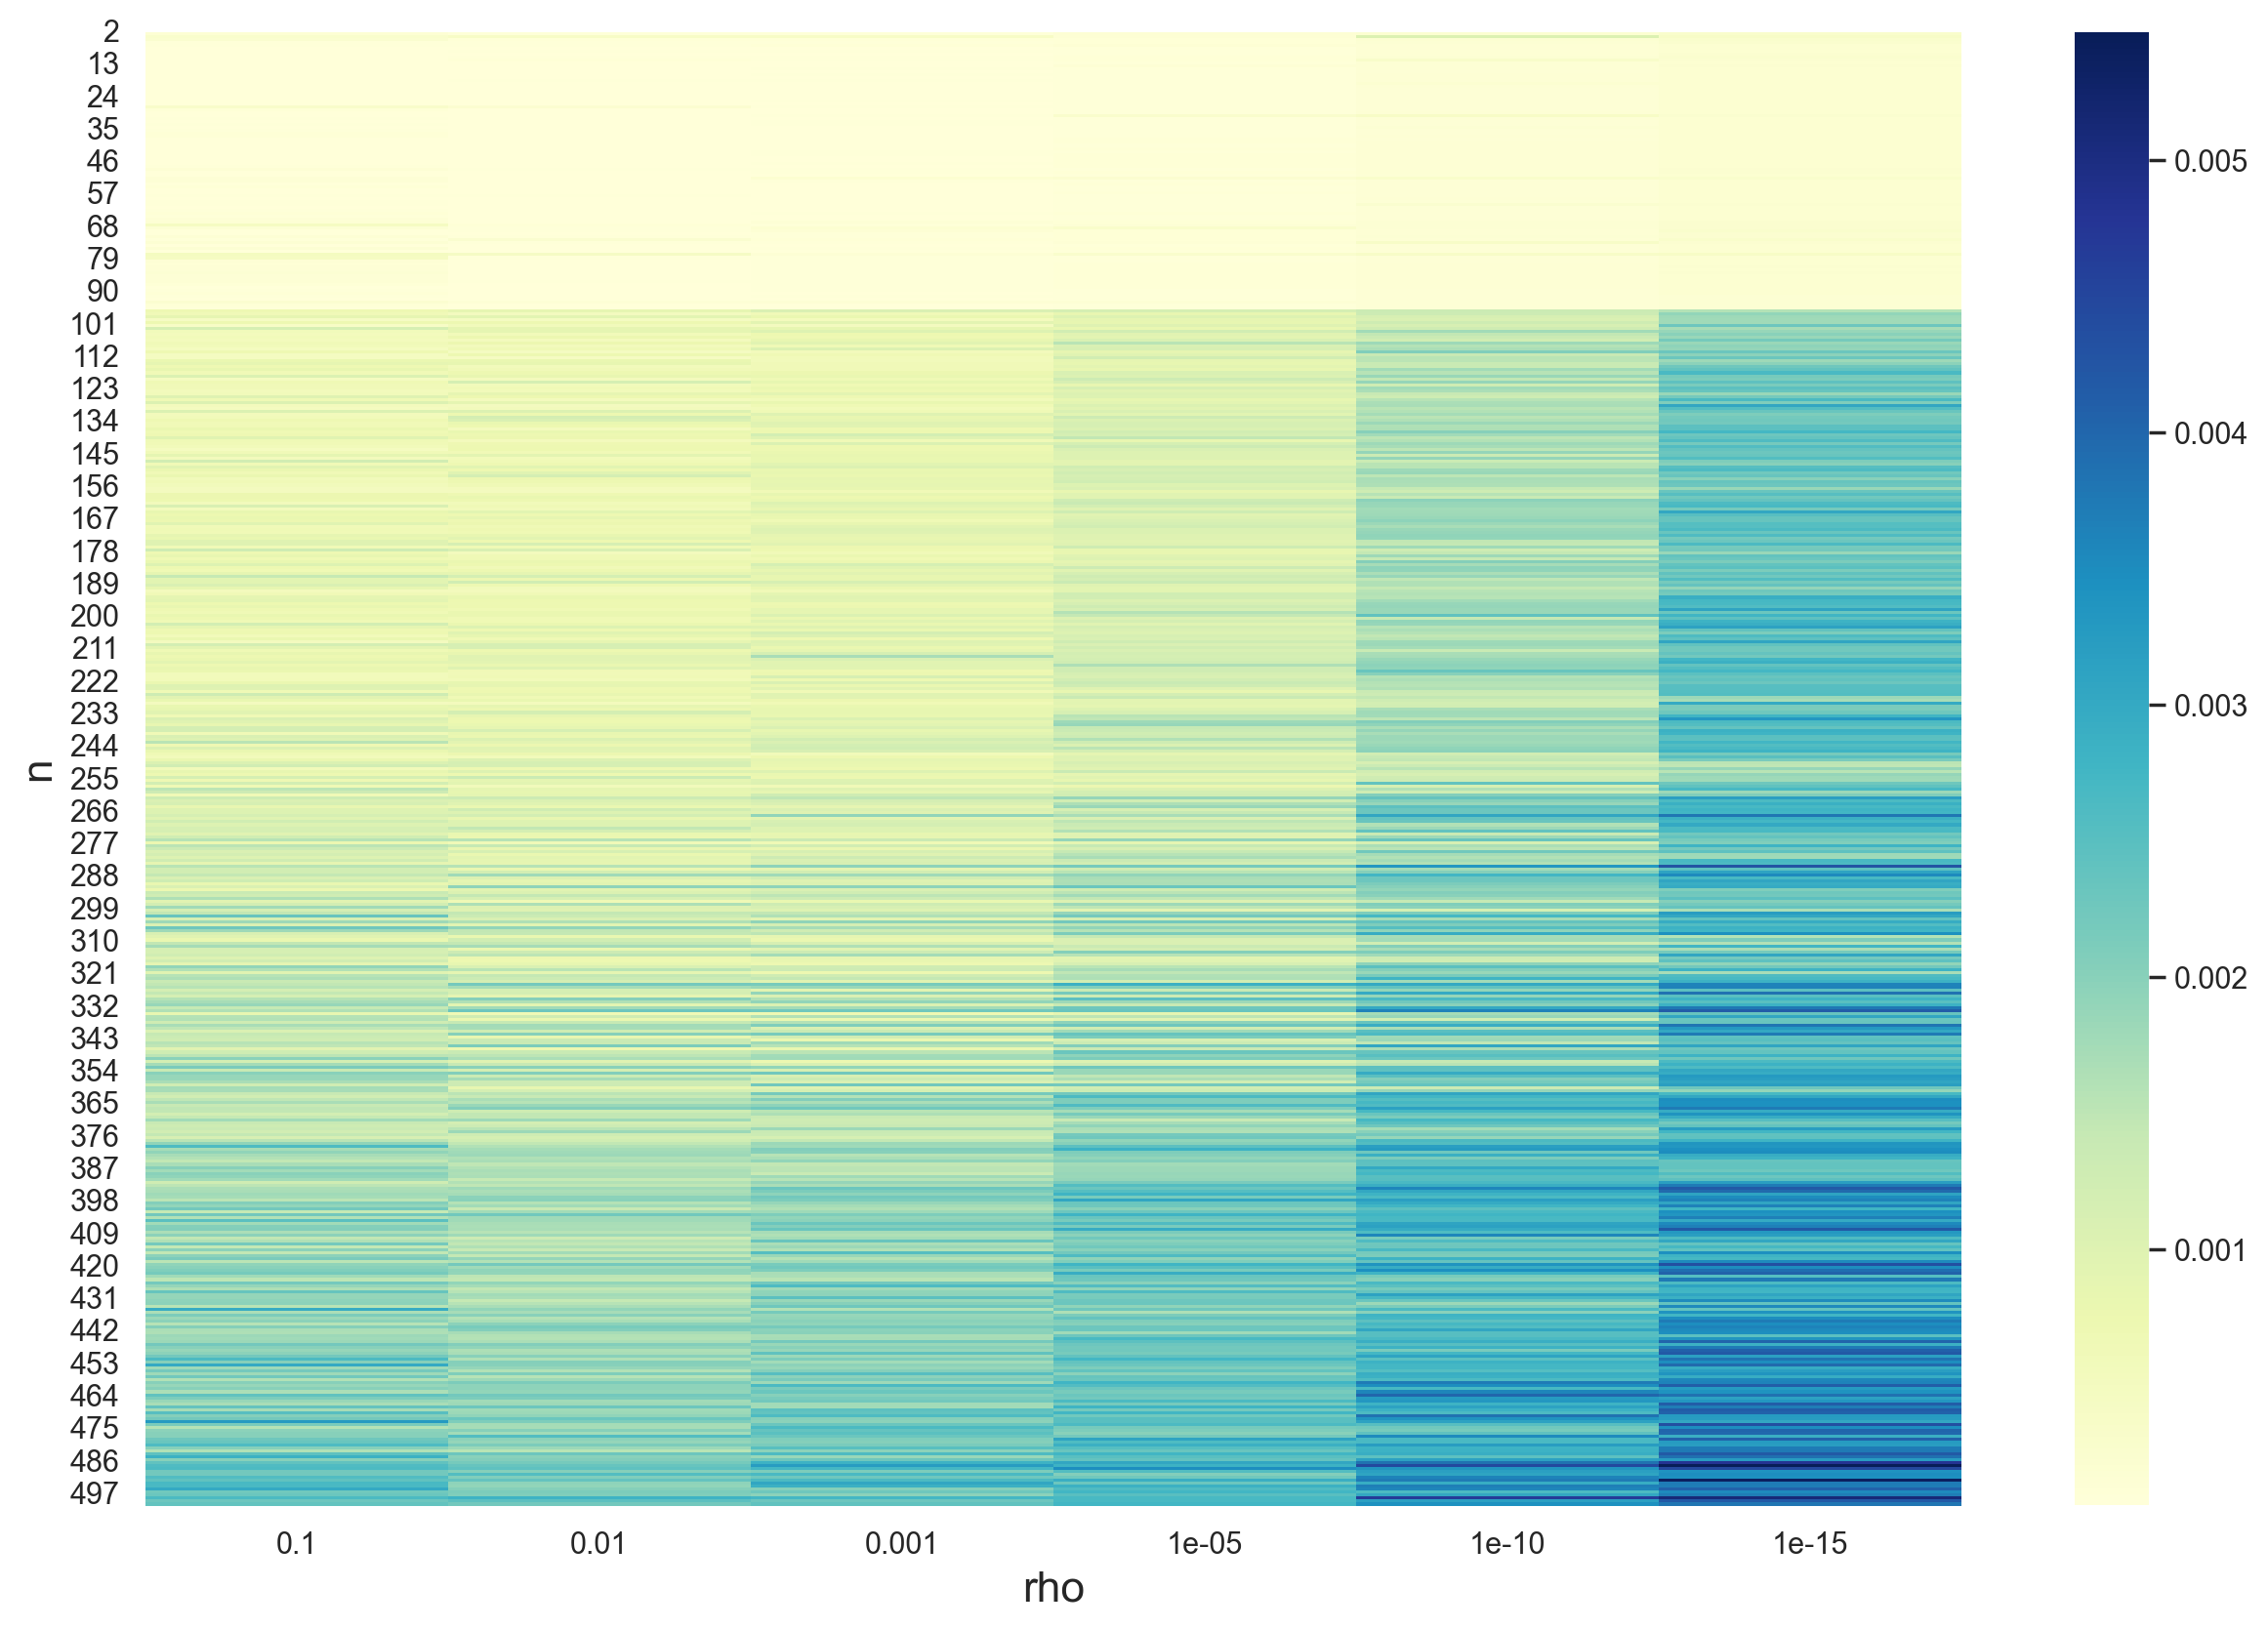

In [34]:
show_heatmap(df_times1, xlabel='rho', ylabel='n', annot=False)

###### Wykres czas√≥w w skali logarytmicznej

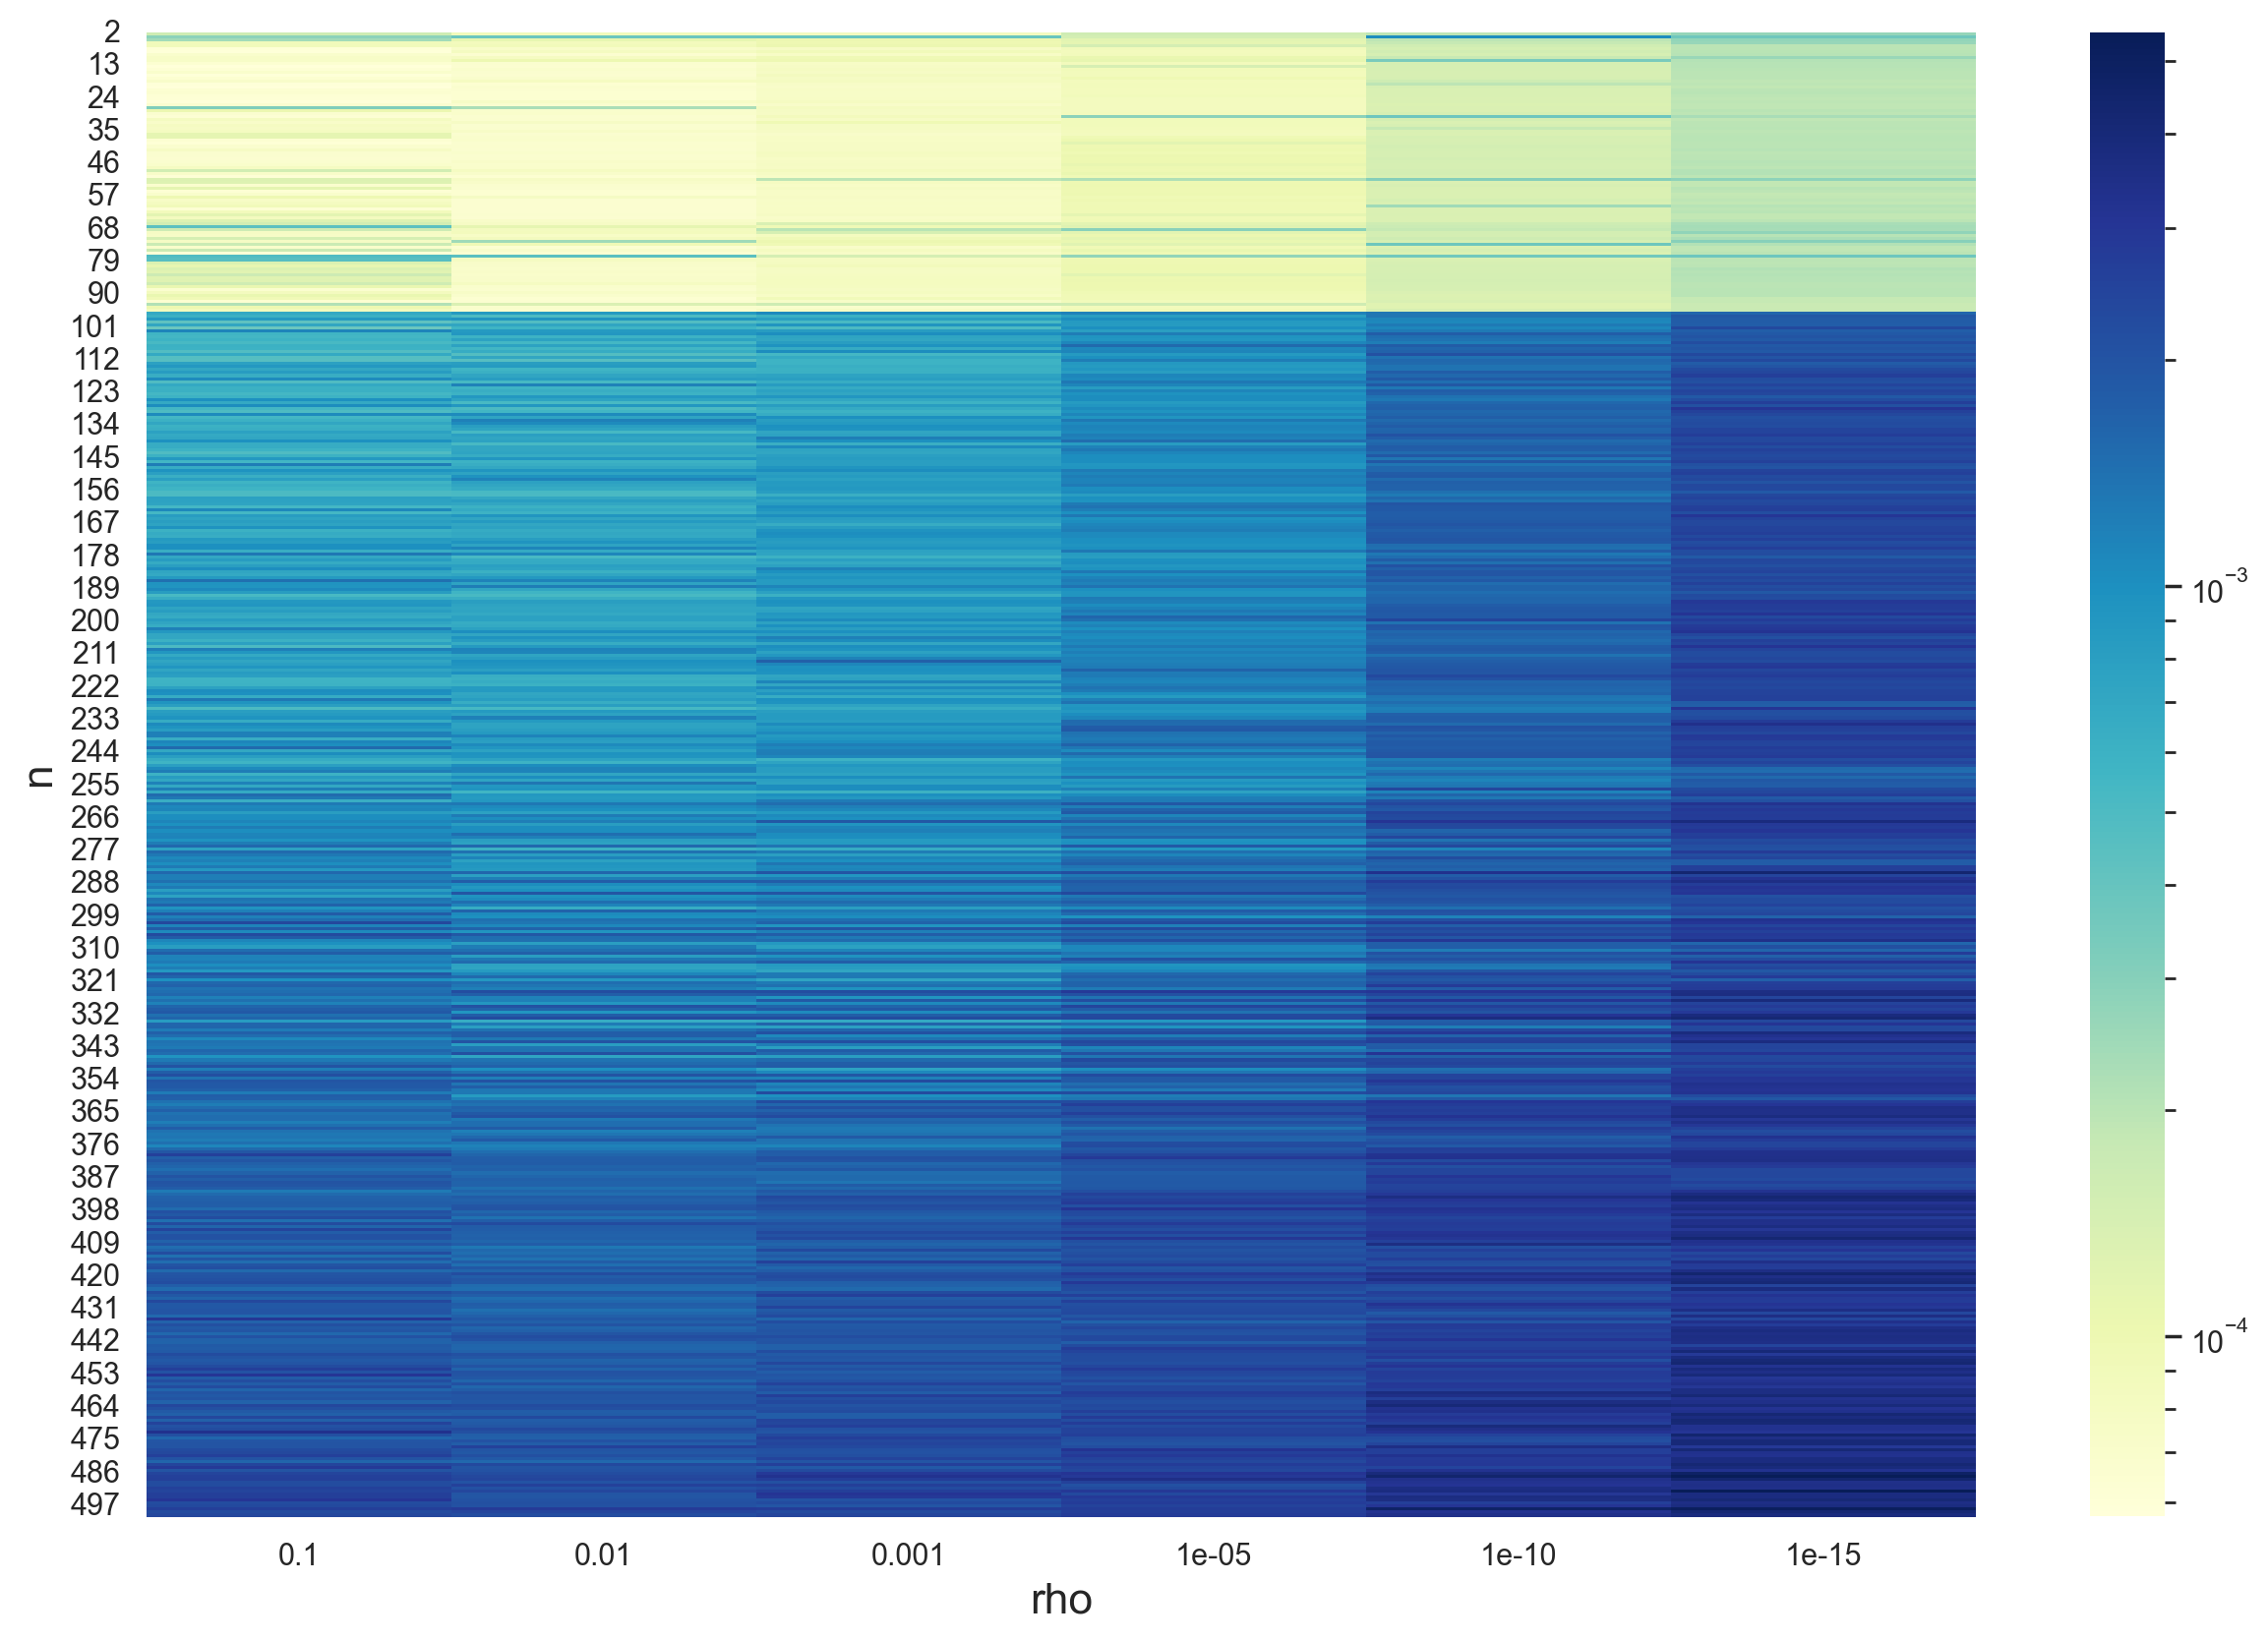

In [35]:
show_heatmap(df_times1, xlabel='rho', ylabel='n', annot=False, norm=LogNorm())

##### B≈Çƒôdy oblicze≈Ñ

Jak mo≈ºemy zauwa≈ºyƒá, zmniejszanie warto≈õci $\rho$ powoduje znaczny wzrost dok≈Çadno≈õci oblicze≈Ñ. Mo≈ºemy r√≥wnie≈º zaobserwowaƒá, ≈ºe zwiƒôkszanie warto≈õci $n$ nie powoduje jednoznacznie pogorszenia dok≈Çadno≈õci oblicze≈Ñ. Wyja≈õnienie tego zjawiska jest proste, a dzieje siƒô tak, dlatego, ≈ºe wykonujemy r√≥≈ºnƒÖ liczbƒô iteracji (tyle, ile potrzeba, aby spe≈Çnione zosta≈Ço kryterium stopu). Mo≈ºe siƒô wiƒôc zdarzyƒá, ≈ºe warto≈õƒá, dla kt√≥rej uzyskujemy bardzo du≈ºy b≈ÇƒÖd (w por√≥wnaniu do pozosta≈Çych warto≈õci) zostanie uznana za wystarczajƒÖco dok≈ÇadnƒÖ, poniewa≈º spe≈Çnione bƒôdzie kryterium stopu. W√≥wczas, dalsze zwiƒôkszanie warto≈õci $n$ powoduje, ≈ºe b≈ÇƒÖd oblicze≈Ñ jest wiƒôkszy (przy ustalonej liczbie iteracji), wiƒôc mo≈ºe siƒô okazaƒá, ≈ºe tym razem, dla tej samej liczby iteracji, co poprzednio, wynik nie jest wystarczajƒÖco dok≈Çadny, wiƒôc konieczne jest wykonanie jeszcze jednej iteracji. Wykonanie dodatkowej iteracji powoduje, ≈ºe otrzymujemy znacznie wy≈ºszƒÖ dok≈Çadno≈õƒá wyniku ni≈º wcze≈õniej, a wiƒôc na poni≈ºszym wykresie, obserwujemy gwa≈ÇtownƒÖ zmianƒô barwy podczas zwiƒôkszania warto≈õci $n$.

In [81]:
df_errors1 = results1['errors']
df_errors1

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.001063      0.000097      0.000097  7.982867e-07  4.956625e-12   
3        0.001288      0.000102      0.000009  8.907753e-07  5.409114e-12   
4        0.001437      0.000108      0.000010  9.255833e-07  5.702960e-12   
5        0.001517      0.000110      0.000010  9.926783e-07  5.805440e-12   
6        0.001545      0.000111      0.000010  9.992201e-07  5.803612e-12   
..            ...           ...           ...           ...           ...   
496      0.000351      0.000351      0.000016  8.954752e-08  6.461528e-12   
497      0.000351      0.000351      0.000016  8.956096e-08  6.461783e-12   
498      0.000351      0.000351      0.000016  8.957430e-08  6.462211e-12   
499      0.000351      0.000351      0.000016  8.958770e-08  6.462691e-12   
500      0.000351      0.000351      0.000016  8.960100e-08  6.462712e-12   

     1.000000e-15  
2    0.000000e+00  
3    0.000000e+00  
4    0.000000e+00  
5    0.000000e+00  
6    3.330669e-16  
..            ...  
496  7.849677e-15  
497  8.409161e-15  
498  8.484312e-15  
499  7.581287e-15  
500  8.147857e-15  

[499 rows x 6 columns]

In [82]:
min_n = 2
interval = 20
df_errors1_part = df_errors1.iloc[ns]
df_errors1_part.to_excel('zad1-errors1-part.xlsx')
df_errors1_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.001063      0.000097      0.000097  7.982867e-07  4.956625e-12   
15       0.001607      0.000131      0.000010  1.146522e-06  5.920699e-12   
30       0.001689      0.000160      0.000010  1.271480e-06  6.013302e-12   
45       0.001823      0.000182      0.000011  7.895538e-08  6.071603e-12   
60       0.001962      0.000200      0.000011  7.958686e-08  6.114352e-12   
75       0.002094      0.000214      0.000012  8.020834e-08  6.148420e-12   
90       0.002217      0.000226      0.000012  8.079694e-08  6.176780e-12   
105      0.002330      0.000236      0.000012  8.135214e-08  6.200934e-12   
120      0.002435      0.000246      0.000013  8.187300e-08  6.222034e-12   
135      0.002532      0.000254      0.000013  8.236410e-08  6.241207e-12   
150      0.002622      0.000261      0.000013  8.282679e-08  6.258038e-12   
165      0.002705      0.000268      0.000013  8.326517e-08  6.273866e-12   
180      0.002784      0.000274      0.000014  8.368057e-08  6.288262e-12   
195      0.002858      0.000280      0.000014  8.407617e-08  6.301372e-12   
210      0.002927      0.000286      0.000014  8.445302e-08  6.314013e-12   
225      0.002993      0.000291      0.000014  8.481356e-08  6.325266e-12   
240      0.003056      0.000296      0.000014  8.515856e-08  6.336243e-12   
255      0.003115      0.000300      0.000015  8.548992e-08  6.346474e-12   
270      0.003172      0.000304      0.000015  8.580823e-08  6.355787e-12   
285      0.003226      0.000308      0.000015  8.611497e-08  6.364966e-12   
300      0.003278      0.000312      0.000015  8.641059e-08  6.373699e-12   
315      0.003327      0.000316      0.000015  8.669628e-08  6.381784e-12   
330      0.003375      0.000320      0.000015  8.697237e-08  6.390136e-12   
345      0.003421      0.000323      0.000015  8.723985e-08  6.397957e-12   
360      0.003465      0.000326      0.000015  8.749897e-08  6.405289e-12   
375      0.003508      0.000329      0.000016  8.775054e-08  6.412392e-12   
390      0.003549      0.000332      0.000016  8.799475e-08  6.418963e-12   
405      0.000335      0.000335      0.000016  8.823230e-08  6.426009e-12   
420      0.000338      0.000338      0.000016  8.846331e-08  6.432360e-12   
435      0.000341      0.000341      0.000016  8.868839e-08  6.438488e-12   
450      0.000343      0.000343      0.000016  8.890764e-08  6.444242e-12   
465      0.000346      0.000346      0.000016  8.912157e-08  6.450027e-12   
480      0.000348      0.000348      0.000016  8.933025e-08  6.455768e-12   
495      0.000350      0.000350      0.000016  8.953414e-08  6.461101e-12   
500      0.000351      0.000351      0.000016  8.960100e-08  6.462712e-12   

     1.000000e-15  
2    0.000000e+00  
15   3.330669e-16  
30   5.978734e-16  
45   6.473657e-16  
60   1.174950e-15  
75   1.430422e-15  
90   1.612692e-15  
105  1.870981e-15  
120  2.519497e-15  
135  2.373386e-15  
150  3.575194e-15  
165  2.808667e-15  
180  3.332519e-15  
195  3.202373e-15  
210  3.629937e-15  
225  3.557914e-15  
240  3.607798e-15  
255  4.551914e-15  
270  4.458897e-15  
285  4.205680e-15  
300  3.810508e-15  
315  4.931440e-15  
330  5.409419e-15  
345  5.482973e-15  
360  4.958858e-15  
375  5.801911e-15  
390  6.329245e-15  
405  6.766898e-15  
420  8.309632e-15  
435  7.951088e-15  
450  8.945394e-15  
465  8.626940e-15  
480  9.569195e-15  
495  8.563124e-15  
500  8.147857e-15

###### Wykres b≈Çƒôd√≥w oblicze≈Ñ w skali liniowej

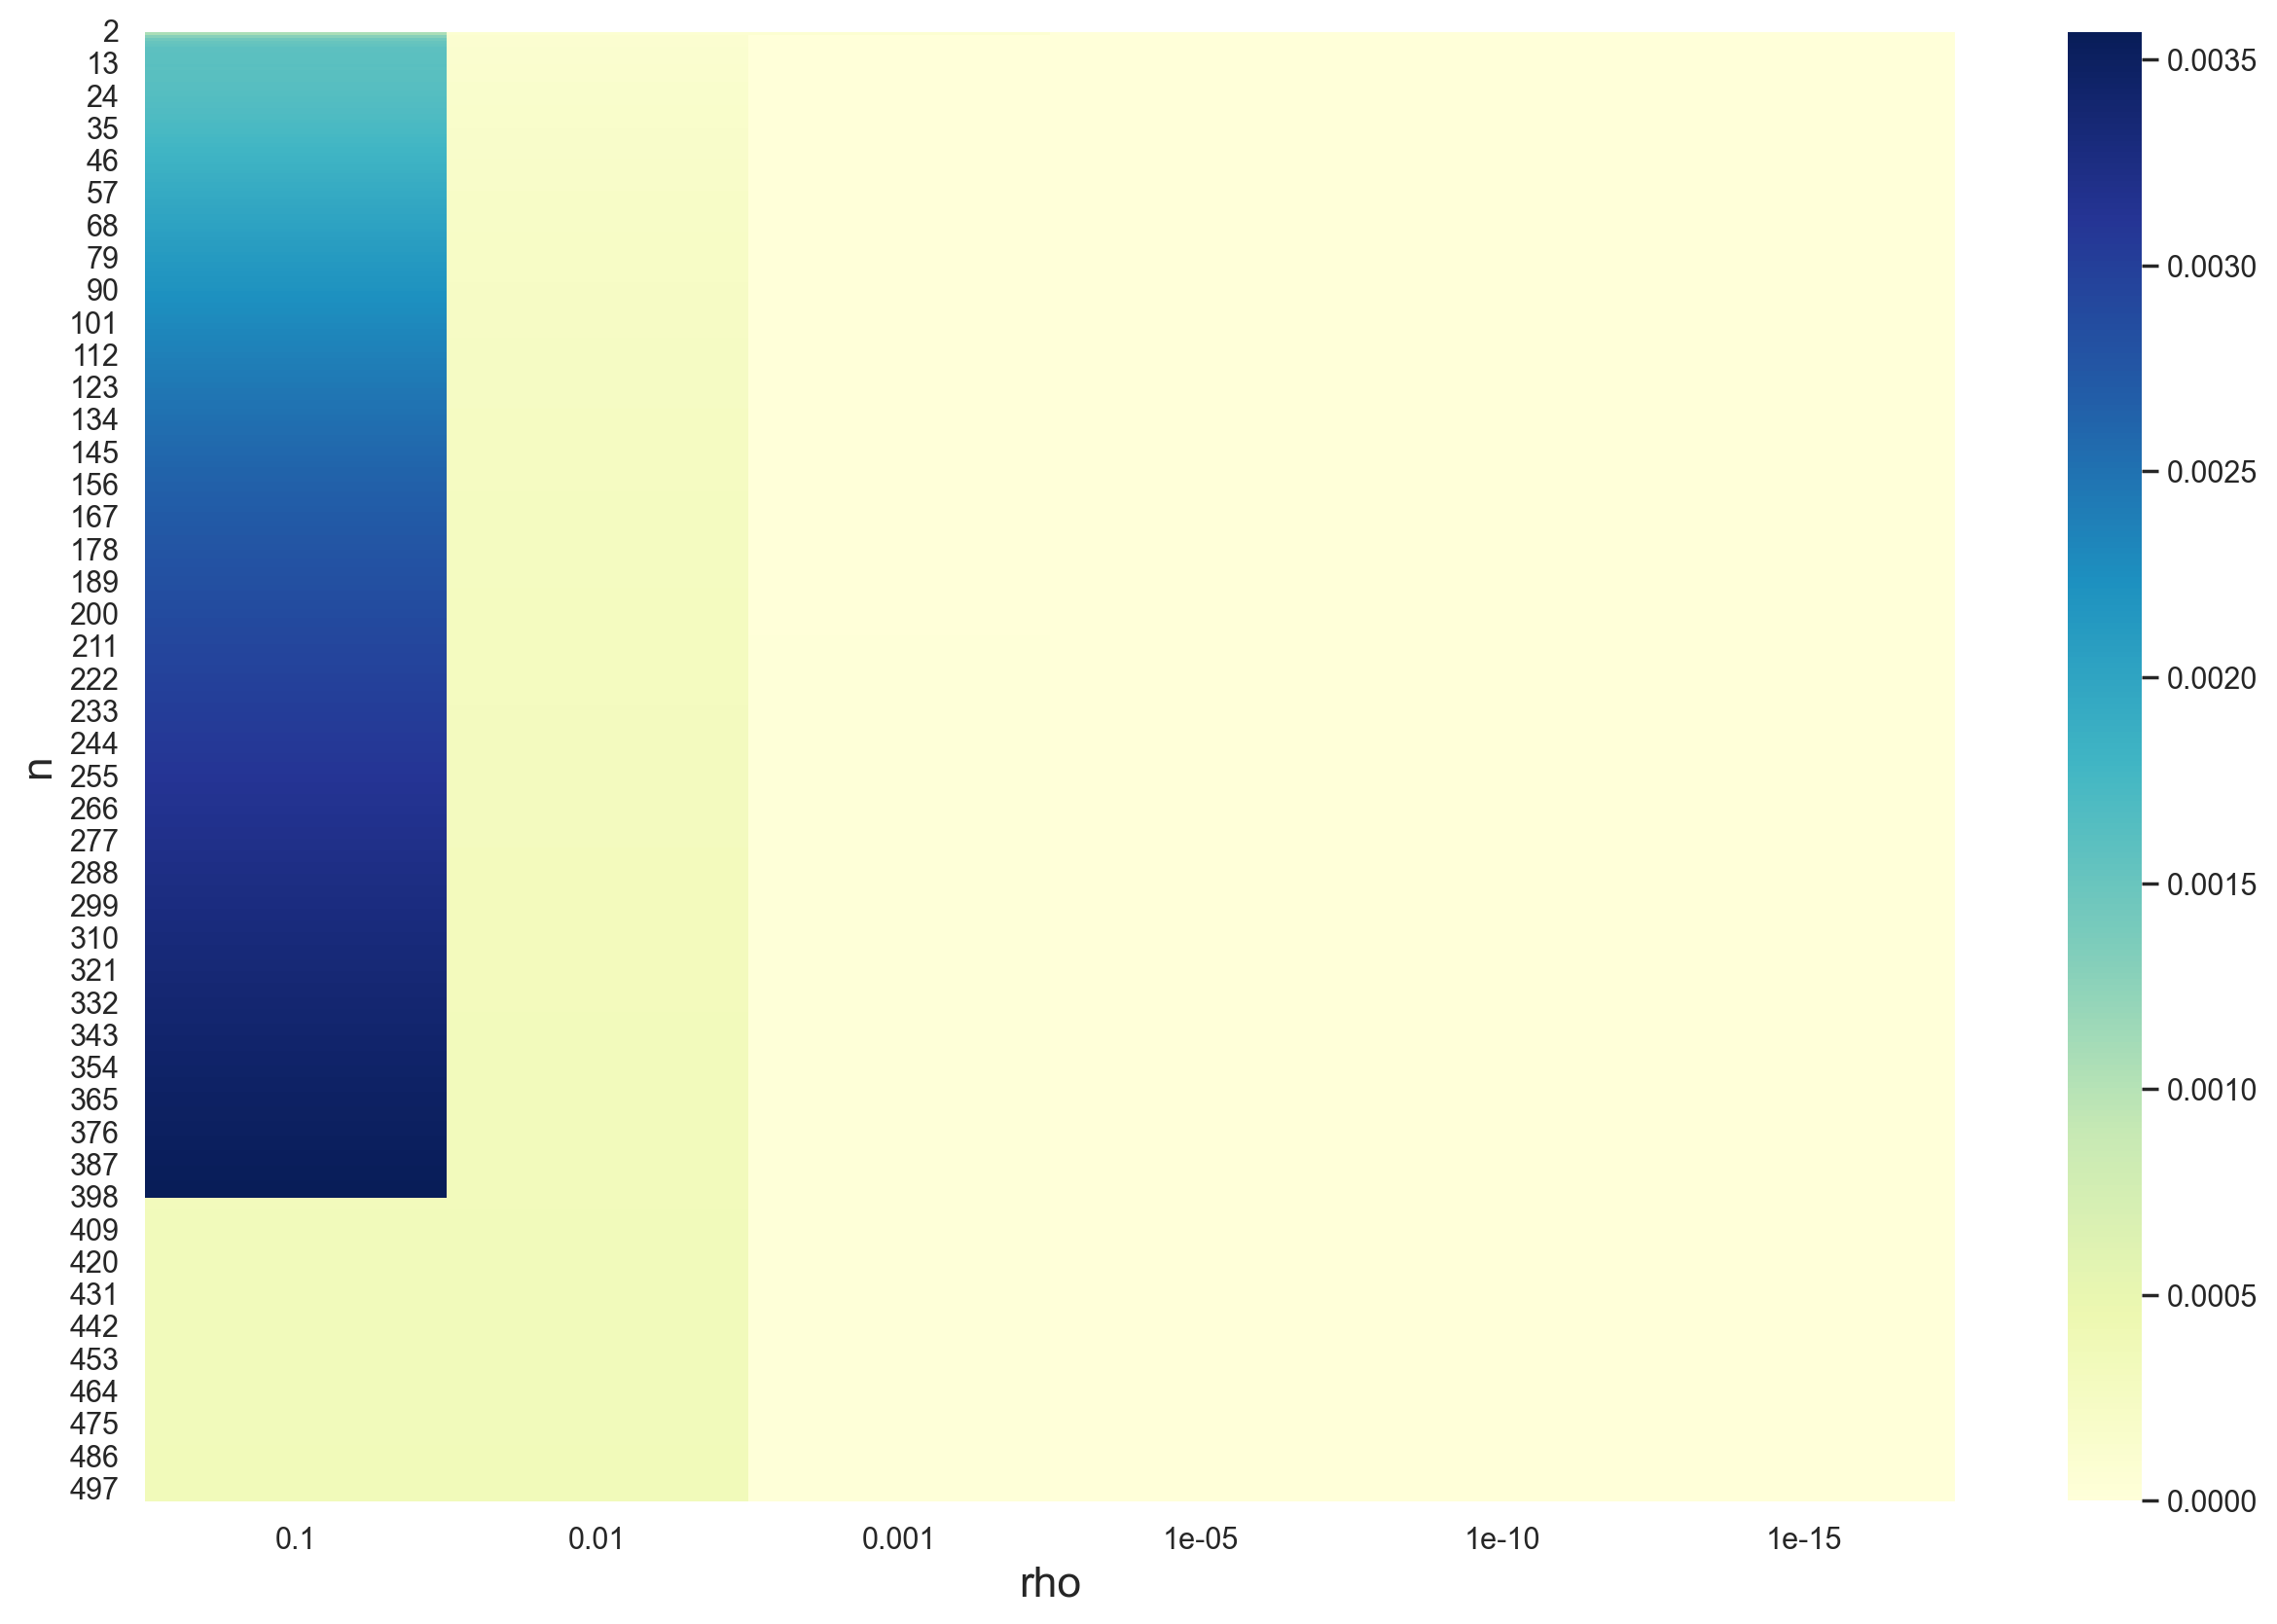

In [114]:
show_heatmap(df_errors1, xlabel='rho', ylabel='n', annot=False)

###### Wykres b≈Çƒôd√≥w oblicze≈Ñ w skali logarytmicznej

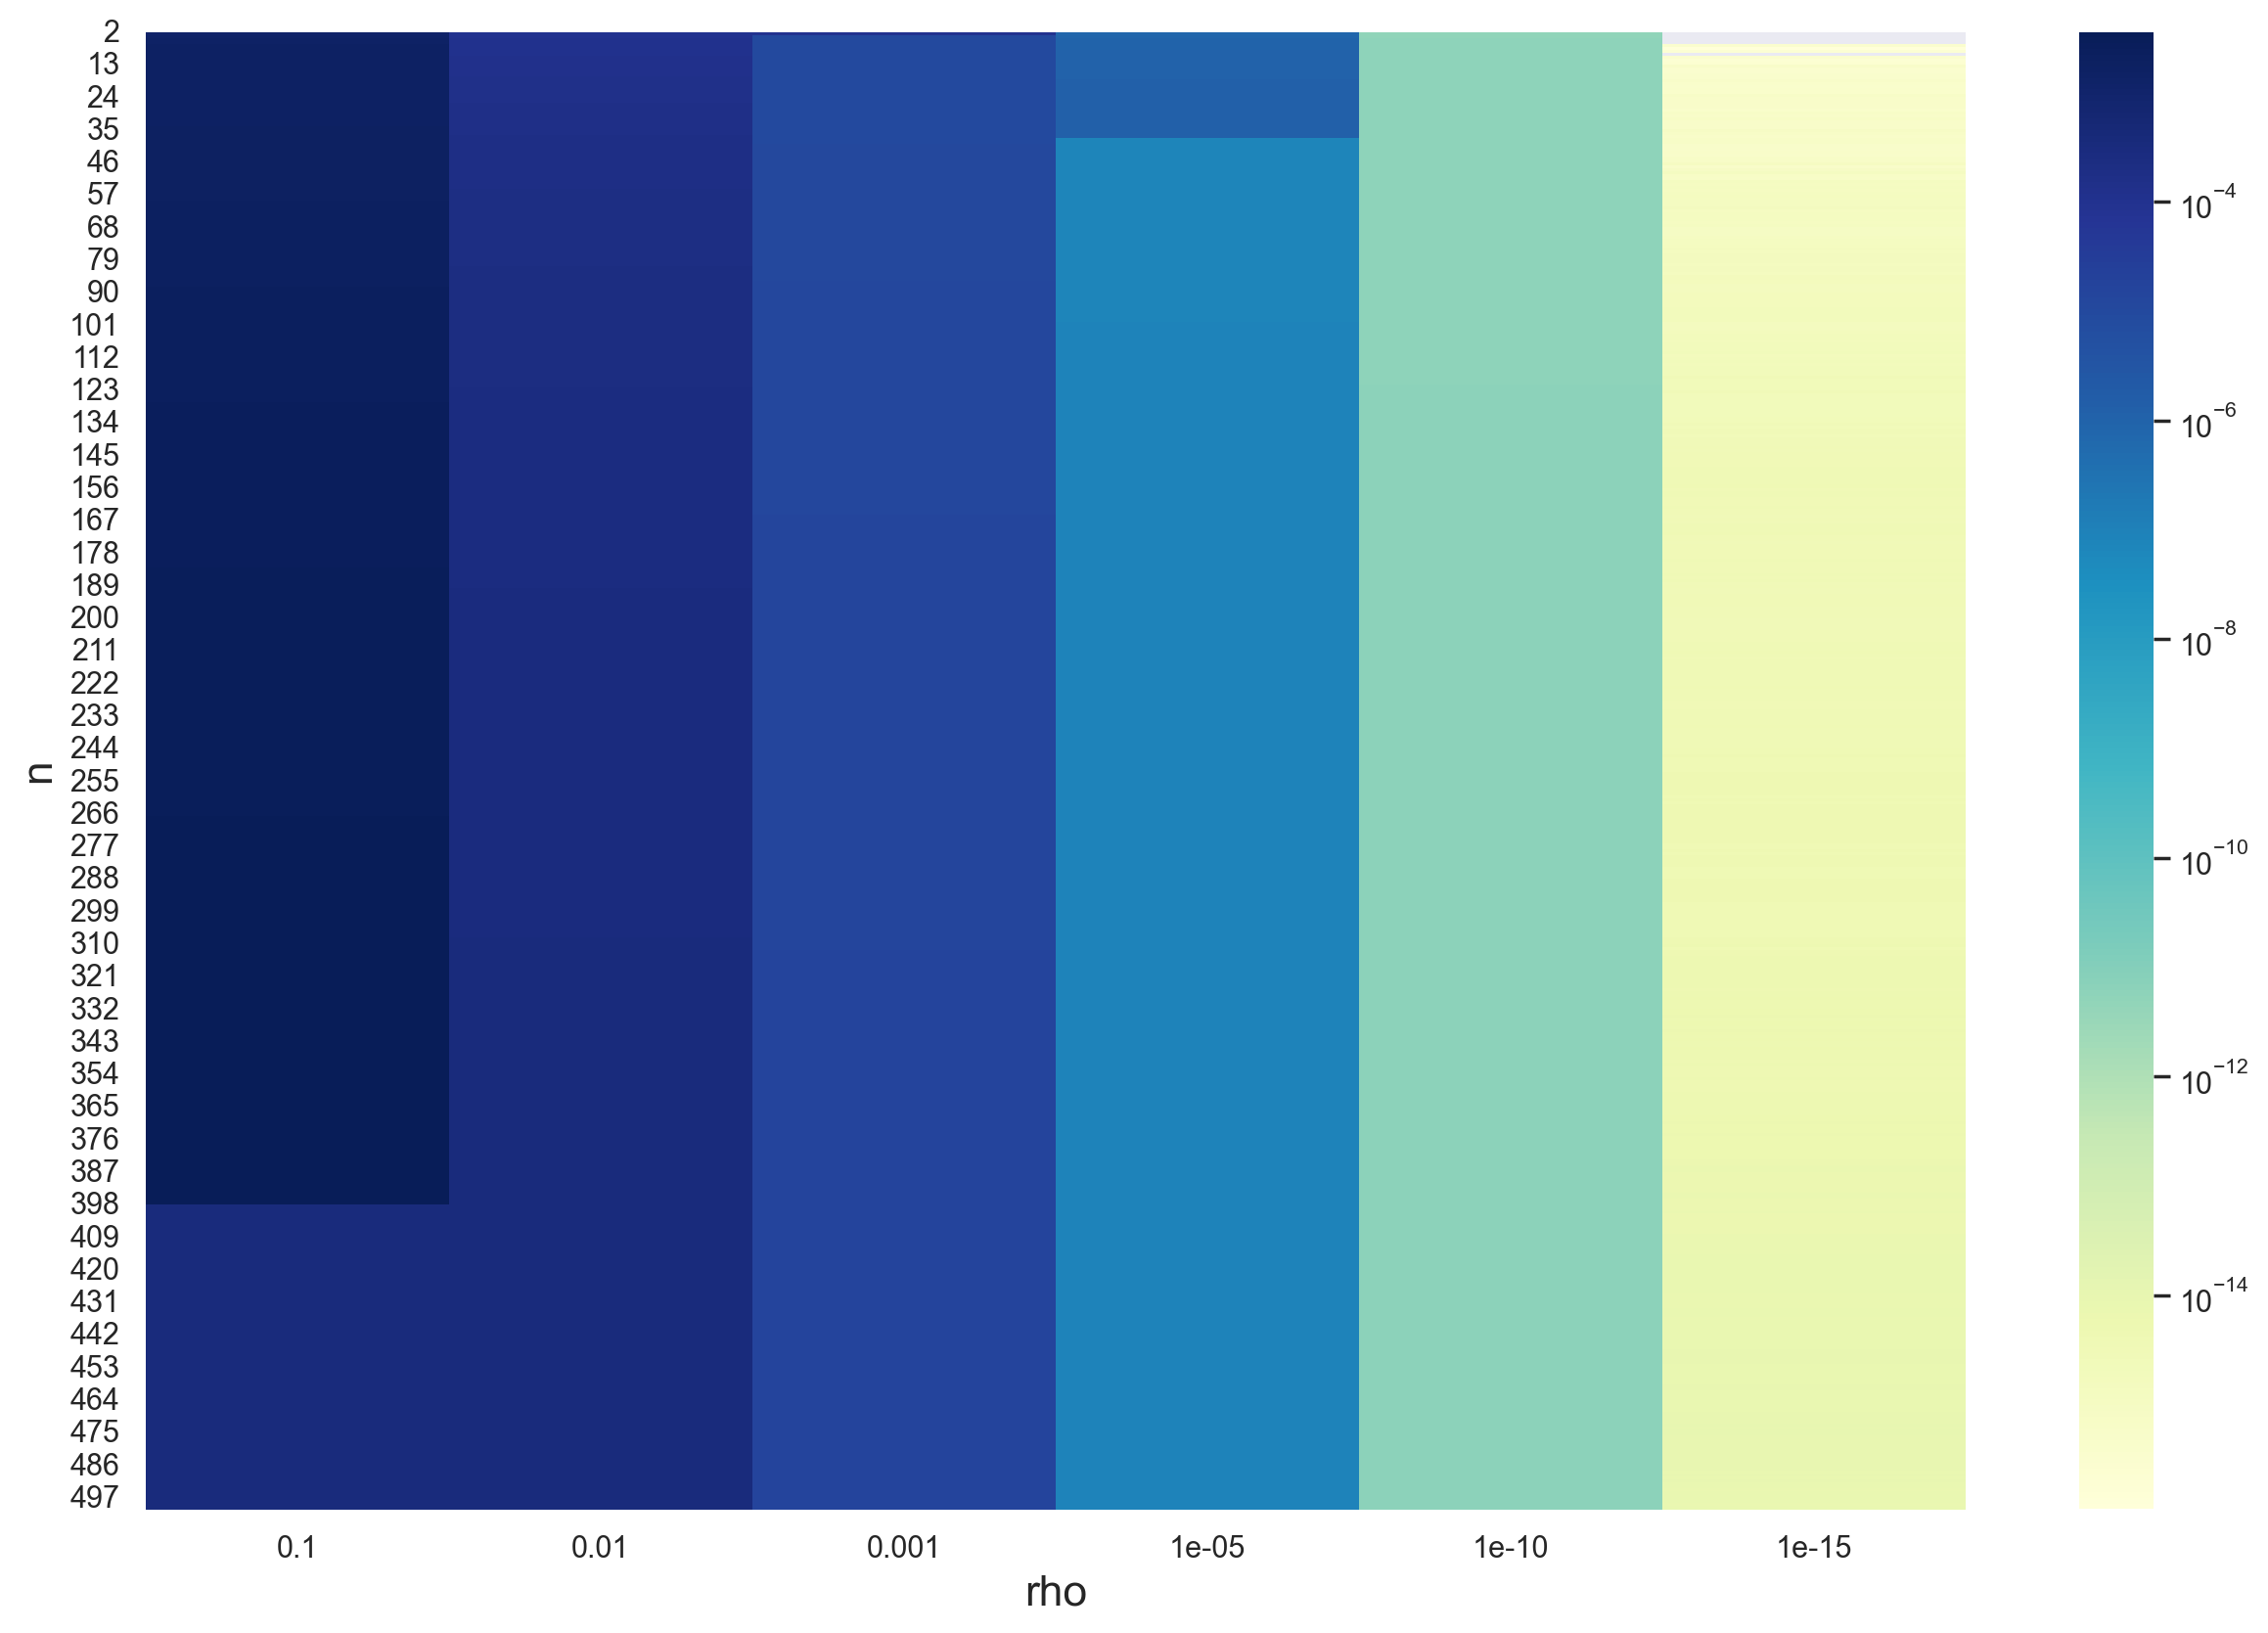

In [115]:
show_heatmap(df_errors1, xlabel='rho', ylabel='n', annot=False, norm=LogNorm())

###### Wp≈Çyw liczby iteracji na b≈ÇƒÖd oblicze≈Ñ

Zamieszczone ni≈ºej fragmenty tabel przedtawiajƒÖ liczbƒô iteracji oraz b≈Çƒôdy dla $\rho=0.1$ w zale≈ºno≈õci od warto≈õci $n$. Tak jak pisa≈Çem wcze≈õniej, dok≈Çadnie widaƒá, ≈ºe w momencie, w kt√≥rym liczba iteracji zwiƒôkszy≈Ça siƒô z $3$ do $4$, dok≈Çadno≈õƒá oblicze≈Ñ uleg≈Ça natychmiastowej poprawie.

In [39]:
df_iters1.iloc[390:400, 0]

392    3.0
393    3.0
394    3.0
395    3.0
396    3.0
397    3.0
398    4.0
399    4.0
400    4.0
401    4.0
Name: 0.1, dtype: float64

In [40]:
df_errors1.iloc[390:400, 0]

392    0.003555
393    0.003557
394    0.003560
395    0.003563
396    0.003565
397    0.003568
398    0.000334
399    0.000334
400    0.000334
401    0.000334
Name: 0.1, dtype: float64

#### Dla 2. kryterium stopu

In [41]:
n_list = list(range(2, 501))
start_vector_fns = lambda _: 0
ùúå_list = [
    1e-1,
    1e-2,
    1e-3,
    1e-5,
    1e-10,
    1e-15
]
stop_criterion = solution_difference

results2 = calculate(n_list, ùúå_list, start_vector_fns, stop_criterion)
print_duration(times['total'])

Obliczono uk≈Çady r√≥wna≈Ñ dla 25 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 50 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 75 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 100 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 125 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 150 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 175 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 200 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 225 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 250 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 275 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 300 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 325 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 350 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 375 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 400 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 425 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 450 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 475 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 499 warto≈õci n
≈ÅƒÖczny czas wykonania: 00:02:12.670


##### Liczby iteracji

Jak widzimy, nie da siƒô wyznaczyƒá rozwiƒÖza≈Ñ dla niekt√≥rych warto≈õci $n$, gdy $\rho = 10^{-15}$. Dzieje siƒô tak prawdopodobnie wskutek pojawienia siƒô du≈ºego b≈Çƒôdu zaokrƒôgle≈Ñ, przez co kryterium stopu nigdy nie jest spe≈Çnione.

In [42]:
df_iters2 = results2['iters']
df_iters2

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2             4.0           5.0           5.0           7.0          12.0   
3             4.0           5.0           6.0           7.0          12.0   
4             4.0           5.0           6.0           7.0          12.0   
5             4.0           5.0           6.0           8.0          12.0   
6             4.0           5.0           6.0           8.0          12.0   
..            ...           ...           ...           ...           ...   
496           4.0           5.0           6.0           8.0          12.0   
497           4.0           5.0           6.0           8.0          12.0   
498           4.0           5.0           6.0           8.0          12.0   
499           4.0           5.0           6.0           8.0          12.0   
500           4.0           5.0           6.0           8.0          12.0   

     1.000000e-15  
2            17.0  
3            17.0  
4            17.0  
5            17.0  
6            17.0  
..            ...  
496           inf  
497           inf  
498           inf  
499           inf  
500           inf  

[499 rows x 6 columns]

In [83]:
df_iters2_part = df_iters2.iloc[ns]
df_iters2_part.to_excel('zad1-iters2-part.xlsx')
df_iters2_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2             4.0           5.0           5.0           7.0          12.0   
15            4.0           5.0           6.0           8.0          12.0   
30            4.0           5.0           6.0           8.0          12.0   
45            4.0           5.0           6.0           8.0          12.0   
60            4.0           5.0           6.0           8.0          12.0   
75            4.0           5.0           6.0           8.0          12.0   
90            4.0           5.0           6.0           8.0          12.0   
105           4.0           5.0           6.0           8.0          12.0   
120           4.0           5.0           6.0           8.0          12.0   
135           4.0           5.0           6.0           8.0          12.0   
150           4.0           5.0           6.0           8.0          12.0   
165           4.0           5.0           6.0           8.0          12.0   
180           4.0           5.0           6.0           8.0          12.0   
195           4.0           5.0           6.0           8.0          12.0   
210           4.0           5.0           6.0           8.0          12.0   
225           4.0           5.0           6.0           8.0          12.0   
240           4.0           5.0           6.0           8.0          12.0   
255           4.0           5.0           6.0           8.0          12.0   
270           4.0           5.0           6.0           8.0          12.0   
285           4.0           5.0           6.0           8.0          12.0   
300           4.0           5.0           6.0           8.0          12.0   
315           4.0           5.0           6.0           8.0          12.0   
330           4.0           5.0           6.0           8.0          12.0   
345           4.0           5.0           6.0           8.0          12.0   
360           4.0           5.0           6.0           8.0          12.0   
375           4.0           5.0           6.0           8.0          12.0   
390           4.0           5.0           6.0           8.0          12.0   
405           4.0           5.0           6.0           8.0          12.0   
420           4.0           5.0           6.0           8.0          12.0   
435           4.0           5.0           6.0           8.0          12.0   
450           4.0           5.0           6.0           8.0          12.0   
465           4.0           5.0           6.0           8.0          12.0   
480           4.0           5.0           6.0           8.0          12.0   
495           4.0           5.0           6.0           8.0          12.0   
500           4.0           5.0           6.0           8.0          12.0   

     1.000000e-15  
2            17.0  
15            inf  
30            inf  
45            inf  
60            inf  
75            inf  
90            inf  
105           inf  
120           inf  
135           inf  
150           inf  
165           inf  
180           inf  
195           inf  
210           inf  
225           inf  
240           inf  
255           inf  
270           inf  
285           inf  
300           inf  
315           inf  
330           inf  
345           inf  
360           inf  
375           inf  
390           inf  
405           inf  
420           inf  
435           inf  
450           inf  
465           inf  
480           inf  
495           inf  
500           inf

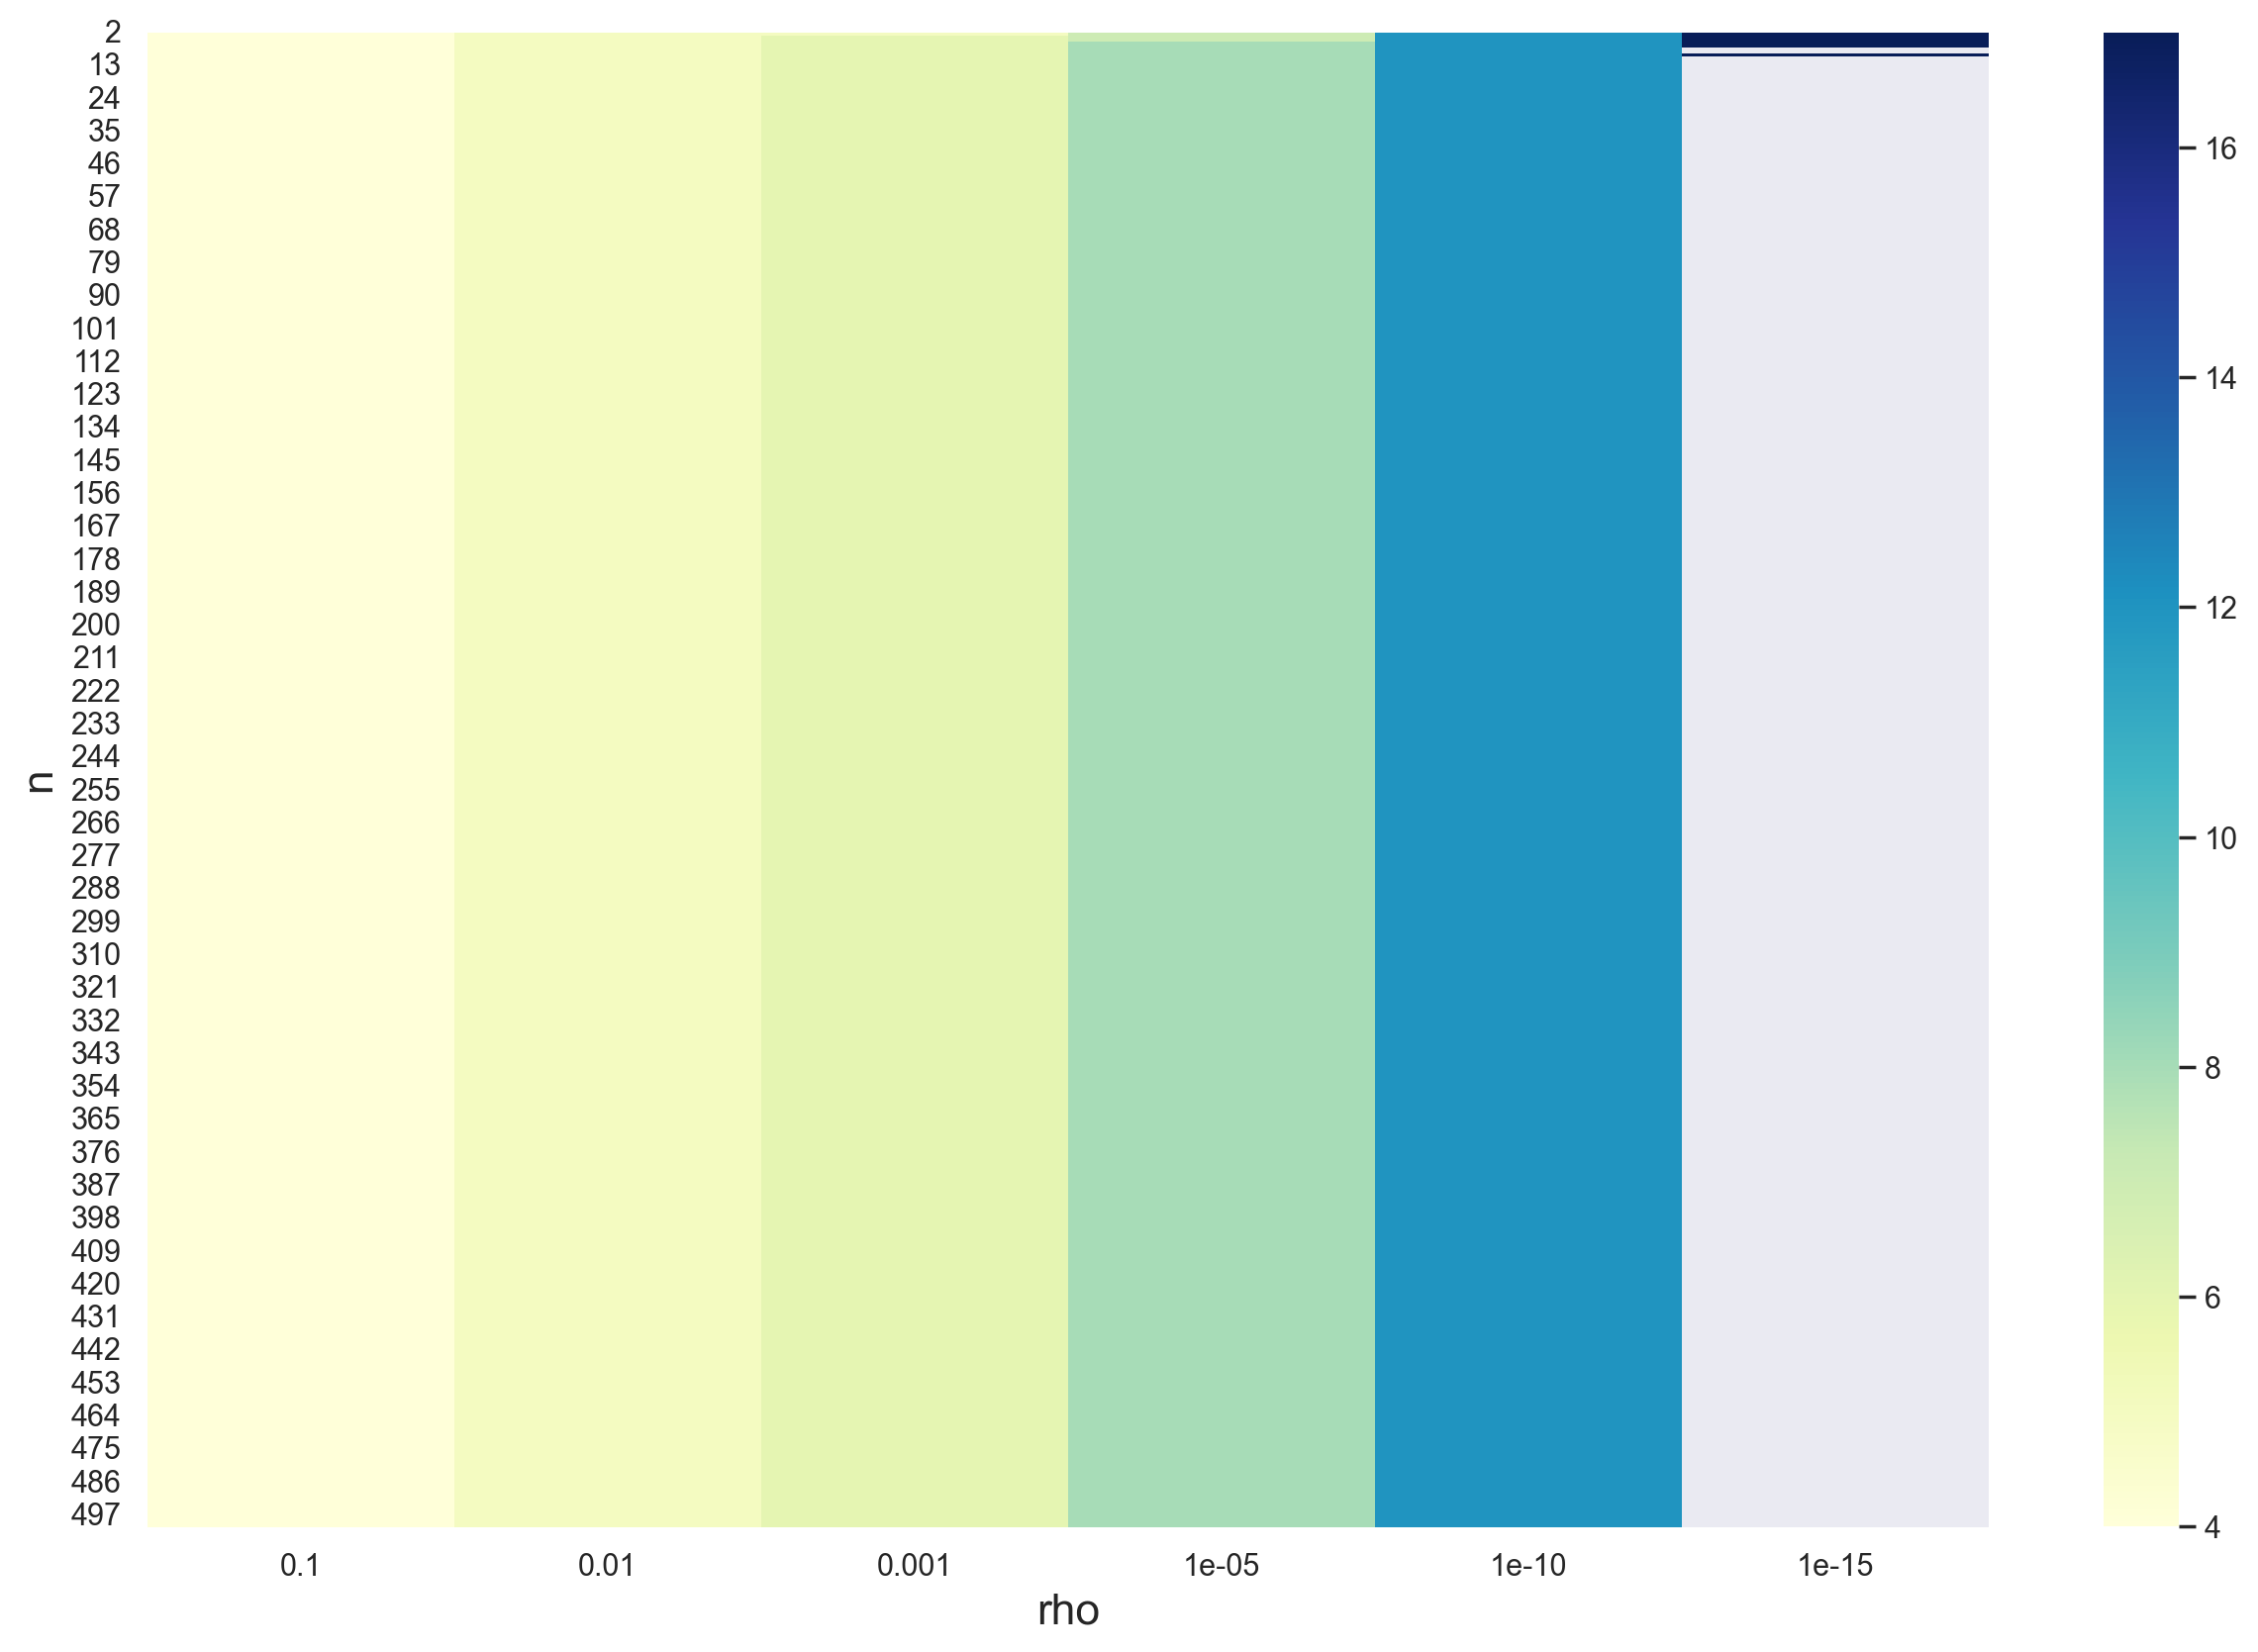

In [43]:
show_heatmap(df_iters2, xlabel='rho', ylabel='n', annot=False)

##### Czasy oblicze≈Ñ

Aby zachowaƒá wiarygodne wyniki, musia≈Çem odrzuciƒá te przypadki, w kt√≥rych nie uda≈Ço siƒô wyznaczyƒá wektora $x$ (obliczenia zosta≈Çy przerwane ze wzglƒôdu na zbyt du≈ºƒÖ liczbƒô iteracji).

In [101]:
df_times2 = results2['times'][df_iters2 != float('inf')]
df_times2.replace(np.NaN, '-')

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000190      0.000115      0.000115      0.000138      0.000215   
3        0.000949      0.000258      0.000132      0.000140      0.000228   
4        0.000101      0.000110      0.000126      0.000139      0.000226   
5        0.000097      0.000110      0.000127      0.000172      0.000228   
6        0.000095      0.000194      0.000373      0.000322      0.000245   
..            ...           ...           ...           ...           ...   
496      0.002856      0.003550      0.003441      0.004166      0.005247   
497      0.003726      0.003163      0.003515      0.004097      0.006187   
498      0.005223      0.006028      0.005609      0.006809      0.008126   
499      0.003136      0.003081      0.003053      0.003946      0.005056   
500      0.003448      0.003724      0.003607      0.004013      0.007532   

    1.000000e-15  
2       0.000309  
3       0.000357  
4       0.000313  
5        0.00033  
6       0.000307  
..           ...  
496            -  
497            -  
498            -  
499            -  
500            -  

[499 rows x 6 columns]

In [100]:
df_times2_part = df_times2.iloc[ns]
df_times2_part.replace(np.NaN, '-').to_excel('zad1-times2-part.xlsx')
df_times2_part.replace(np.NaN, '-')

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000190      0.000115      0.000115      0.000138      0.000215   
15       0.000104      0.000080      0.000090      0.000120      0.000161   
30       0.000097      0.000075      0.000088      0.000156      0.000153   
45       0.000265      0.000111      0.000113      0.000292      0.000554   
60       0.000182      0.000130      0.000100      0.000125      0.000173   
75       0.000154      0.000106      0.000121      0.000148      0.000208   
90       0.000198      0.000113      0.000191      0.000148      0.000208   
105      0.001288      0.001384      0.001302      0.001680      0.002609   
120      0.001690      0.001505      0.001482      0.001440      0.002455   
135      0.000945      0.001027      0.001211      0.001762      0.002604   
150      0.001591      0.001077      0.001139      0.001478      0.002847   
165      0.001607      0.001173      0.001034      0.001337      0.002065   
180      0.001176      0.001387      0.001504      0.001652      0.002584   
195      0.001246      0.001344      0.001572      0.002151      0.002916   
210      0.001176      0.001248      0.001709      0.002371      0.002907   
225      0.001083      0.001683      0.001515      0.002016      0.003251   
240      0.001311      0.001395      0.001656      0.002273      0.003143   
255      0.001466      0.001709      0.002163      0.002540      0.003609   
270      0.001646      0.001380      0.001744      0.002373      0.004208   
285      0.001637      0.001840      0.002208      0.003907      0.003824   
300      0.002075      0.002091      0.002497      0.002679      0.003733   
315      0.001963      0.001883      0.002354      0.002981      0.002977   
330      0.002288      0.001886      0.001893      0.001857      0.003474   
345      0.002258      0.003221      0.003466      0.003564      0.005231   
360      0.002002      0.003018      0.002844      0.002715      0.003814   
375      0.002417      0.001874      0.001930      0.003182      0.002943   
390      0.002318      0.002195      0.002424      0.003314      0.003822   
405      0.002661      0.002252      0.002475      0.003200      0.004086   
420      0.002853      0.002412      0.002657      0.003501      0.004237   
435      0.001985      0.002104      0.003087      0.002731      0.004575   
450      0.002144      0.002253      0.003307      0.003208      0.004377   
465      0.003428      0.002674      0.003077      0.003702      0.005045   
480      0.003169      0.003102      0.003149      0.003617      0.005216   
495      0.003548      0.003652      0.003855      0.004685      0.005109   
500      0.003448      0.003724      0.003607      0.004013      0.007532   

    1.000000e-15  
2       0.000309  
15             -  
30             -  
45             -  
60             -  
75             -  
90             -  
105            -  
120            -  
135            -  
150            -  
165            -  
180            -  
195            -  
210            -  
225            -  
240            -  
255            -  
270            -  
285            -  
300            -  
315            -  
330            -  
345            -  
360            -  
375            -  
390            -  
405            -  
420            -  
435            -  
450            -  
465            -  
480            -  
495            -  
500            -

###### Wykres czas√≥w w skali liniowej

In [107]:
df_times2.max()

1.000000e-01    0.008745
1.000000e-02    0.020649
1.000000e-03    0.013253
1.000000e-05    0.012463
1.000000e-10    0.012395
1.000000e-15    0.000357
dtype: float64

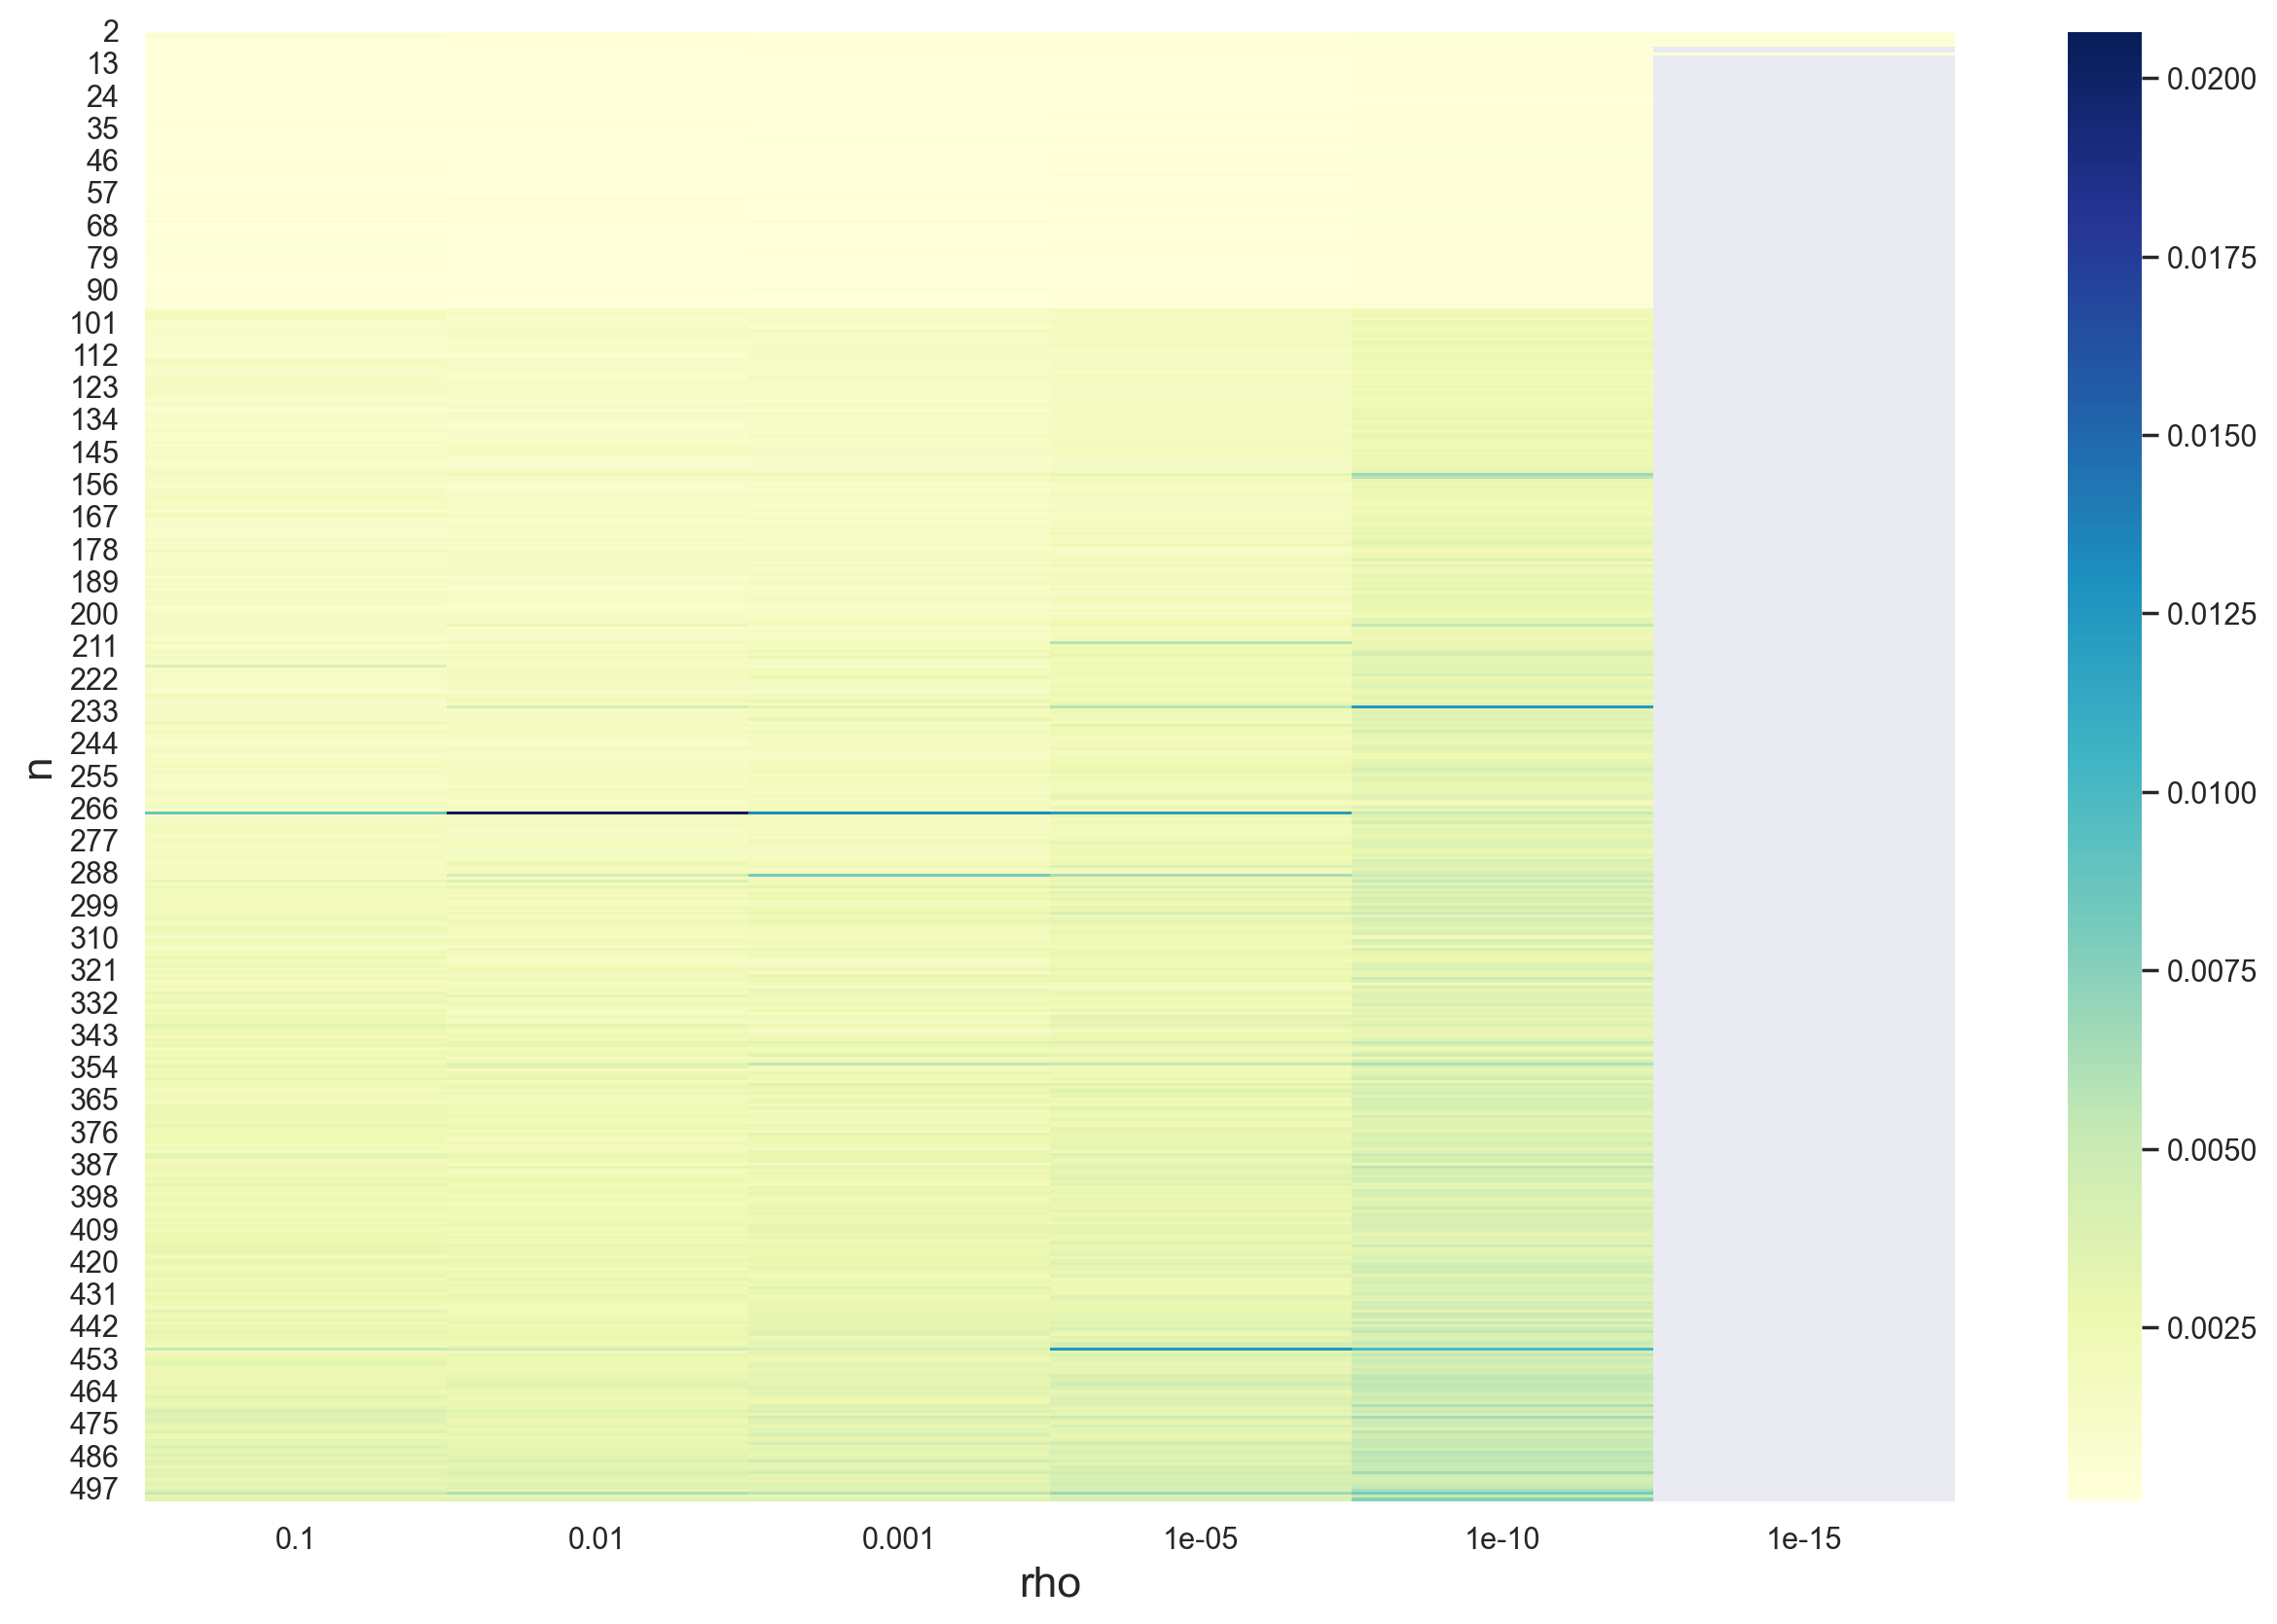

In [102]:
show_heatmap(df_times2, xlabel='rho', ylabel='n', annot=False)

###### Wykres czas√≥w w skali logarytmicznej

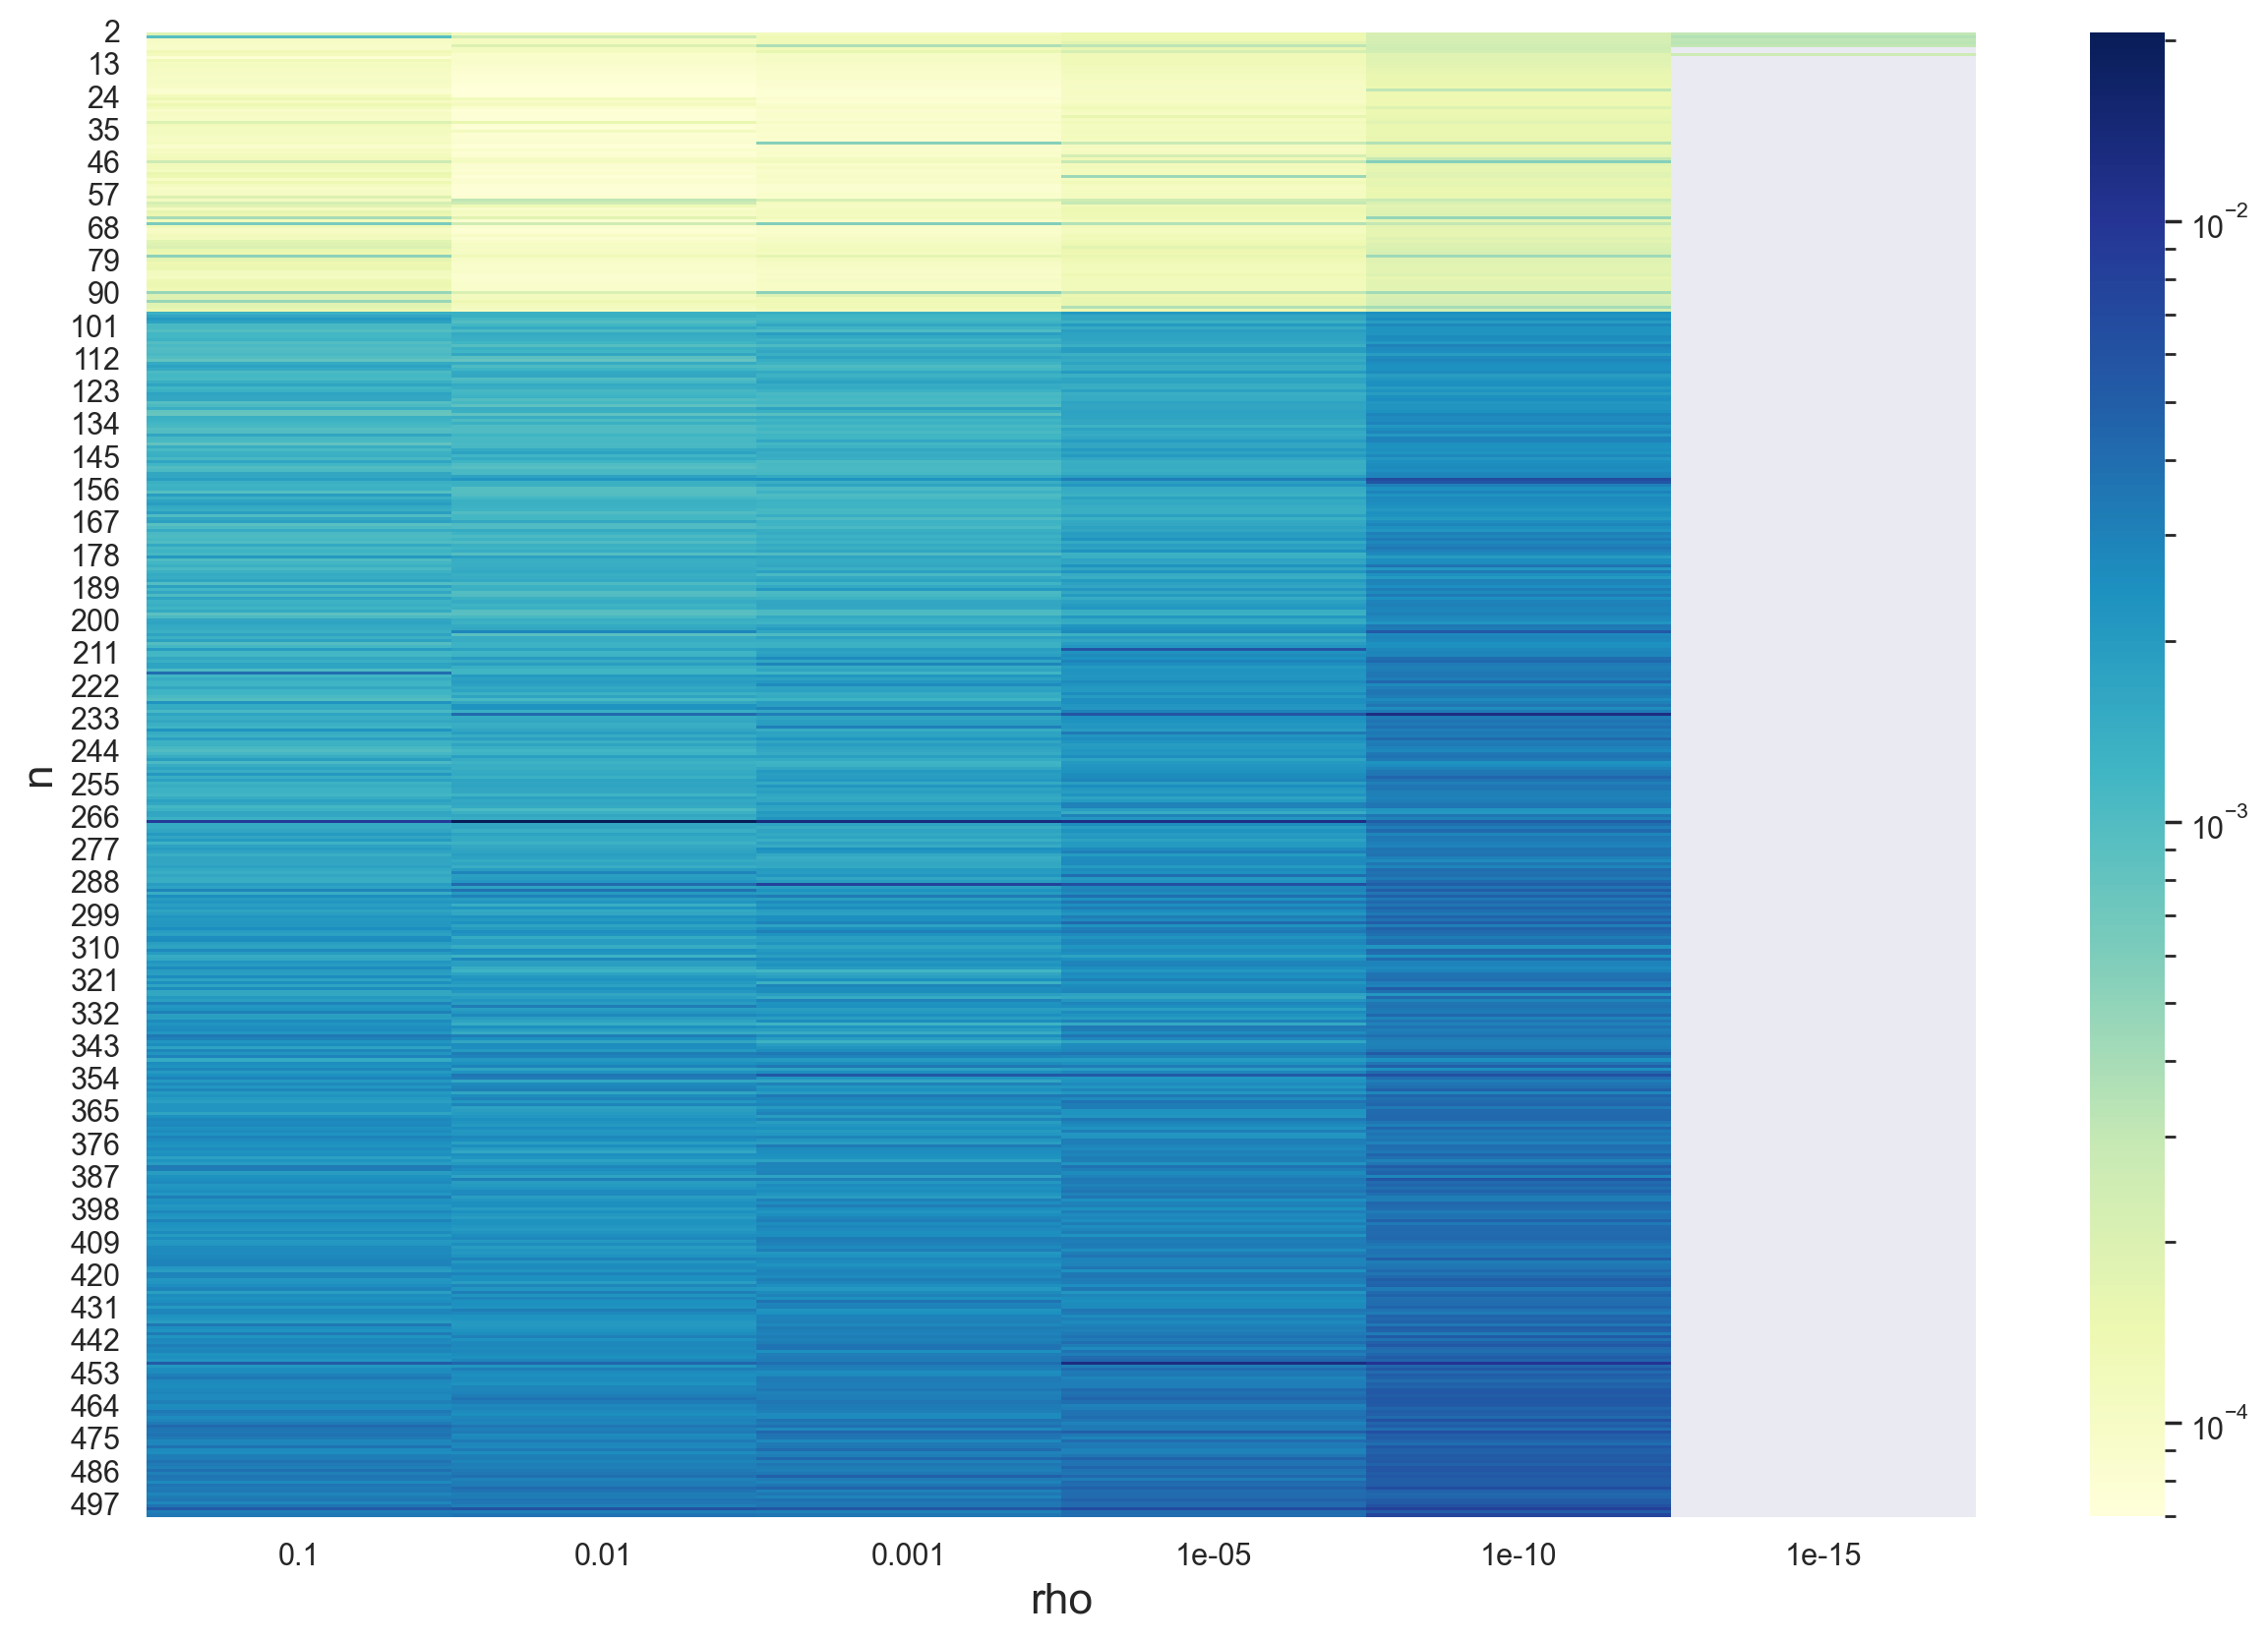

In [103]:
show_heatmap(df_times2, xlabel='rho', ylabel='n', annot=False, norm=LogNorm())

###### B≈Çƒôdy oblicze≈Ñ

In [110]:
df_errors2 = results2['errors'][df_iters2 != float('inf')]
df_errors2.replace(np.NaN, '-')

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000097      0.000009  8.781154e-06  7.257152e-08  4.506165e-13   
3        0.000102      0.000009  8.907753e-07  7.748681e-08  4.887428e-13   
4        0.000108      0.000010  9.255833e-07  8.300271e-08  5.209427e-13   
5        0.000110      0.000010  9.926783e-07  7.976261e-09  5.179087e-13   
6        0.000111      0.000010  9.992201e-07  8.000581e-09  5.196836e-13   
..            ...           ...           ...           ...           ...   
496      0.000351      0.000016  1.858970e-06  8.960966e-09  4.969853e-13   
497      0.000351      0.000016  1.859425e-06  8.961502e-09  4.971956e-13   
498      0.000351      0.000016  1.859877e-06  8.962031e-09  4.973066e-13   
499      0.000351      0.000016  1.860331e-06  8.962565e-09  4.970875e-13   
500      0.000351      0.000016  1.860781e-06  8.963092e-09  4.968354e-13   

    1.000000e-15  
2            0.0  
3            0.0  
4            0.0  
5            0.0  
6            0.0  
..           ...  
496            -  
497            -  
498            -  
499            -  
500            -  

[499 rows x 6 columns]

In [111]:
df_errors2_part = df_errors2.iloc[ns][df_iters2 != float('inf')]
df_errors2_part.replace(np.NaN, '-').to_excel('zad1-errors2-part.xlsx')
df_errors2_part.replace(np.NaN, '-')

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000097      0.000009      0.000009  7.257152e-08  4.506165e-13   
15       0.000131      0.000010      0.000001  8.243482e-09  5.133348e-13   
30       0.000160      0.000010      0.000001  8.364028e-09  5.092709e-13   
45       0.000182      0.000011      0.000001  8.435574e-09  5.072055e-13   
60       0.000200      0.000011      0.000001  8.487832e-09  5.057760e-13   
75       0.000214      0.000012      0.000001  8.530297e-09  5.044959e-13   
90       0.000226      0.000012      0.000001  8.565965e-09  5.037609e-13   
105      0.000236      0.000012      0.000002  8.597169e-09  5.027791e-13   
120      0.000246      0.000013      0.000002  8.624772e-09  5.022372e-13   
135      0.000254      0.000013      0.000002  8.649756e-09  5.018477e-13   
150      0.000261      0.000013      0.000002  8.672473e-09  5.012208e-13   
165      0.000268      0.000013      0.000002  8.693447e-09  5.009126e-13   
180      0.000274      0.000014      0.000002  8.712850e-09  5.003711e-13   
195      0.000280      0.000014      0.000002  8.731000e-09  5.003351e-13   
210      0.000286      0.000014      0.000002  8.747990e-09  5.002644e-13   
225      0.000291      0.000014      0.000002  8.764031e-09  4.996475e-13   
240      0.000296      0.000014      0.000002  8.779178e-09  4.996391e-13   
255      0.000300      0.000015      0.000002  8.793579e-09  4.993007e-13   
270      0.000304      0.000015      0.000002  8.807267e-09  4.989014e-13   
285      0.000308      0.000015      0.000002  8.820353e-09  4.985513e-13   
300      0.000312      0.000015      0.000002  8.832856e-09  4.981485e-13   
315      0.000316      0.000015      0.000002  8.844860e-09  4.979729e-13   
330      0.000320      0.000015      0.000002  8.856379e-09  4.979858e-13   
345      0.000323      0.000015      0.000002  8.867479e-09  4.980160e-13   
360      0.000326      0.000015      0.000002  8.878166e-09  4.978739e-13   
375      0.000329      0.000016      0.000002  8.888495e-09  4.981047e-13   
390      0.000332      0.000016      0.000002  8.898470e-09  4.975252e-13   
405      0.000335      0.000016      0.000002  8.908136e-09  4.975935e-13   
420      0.000338      0.000016      0.000002  8.917493e-09  4.977027e-13   
435      0.000341      0.000016      0.000002  8.926579e-09  4.975126e-13   
450      0.000343      0.000016      0.000002  8.935395e-09  4.974978e-13   
465      0.000346      0.000016      0.000002  8.943972e-09  4.972908e-13   
480      0.000348      0.000016      0.000002  8.952310e-09  4.973773e-13   
495      0.000350      0.000016      0.000002  8.960435e-09  4.971008e-13   
500      0.000351      0.000016      0.000002  8.963092e-09  4.968354e-13   

    1.000000e-15  
2            0.0  
15             -  
30             -  
45             -  
60             -  
75             -  
90             -  
105            -  
120            -  
135            -  
150            -  
165            -  
180            -  
195            -  
210            -  
225            -  
240            -  
255            -  
270            -  
285            -  
300            -  
315            -  
330            -  
345            -  
360            -  
375            -  
390            -  
405            -  
420            -  
435            -  
450            -  
465            -  
480            -  
495            -  
500            -

###### Wykres czas√≥w w skali liniowej

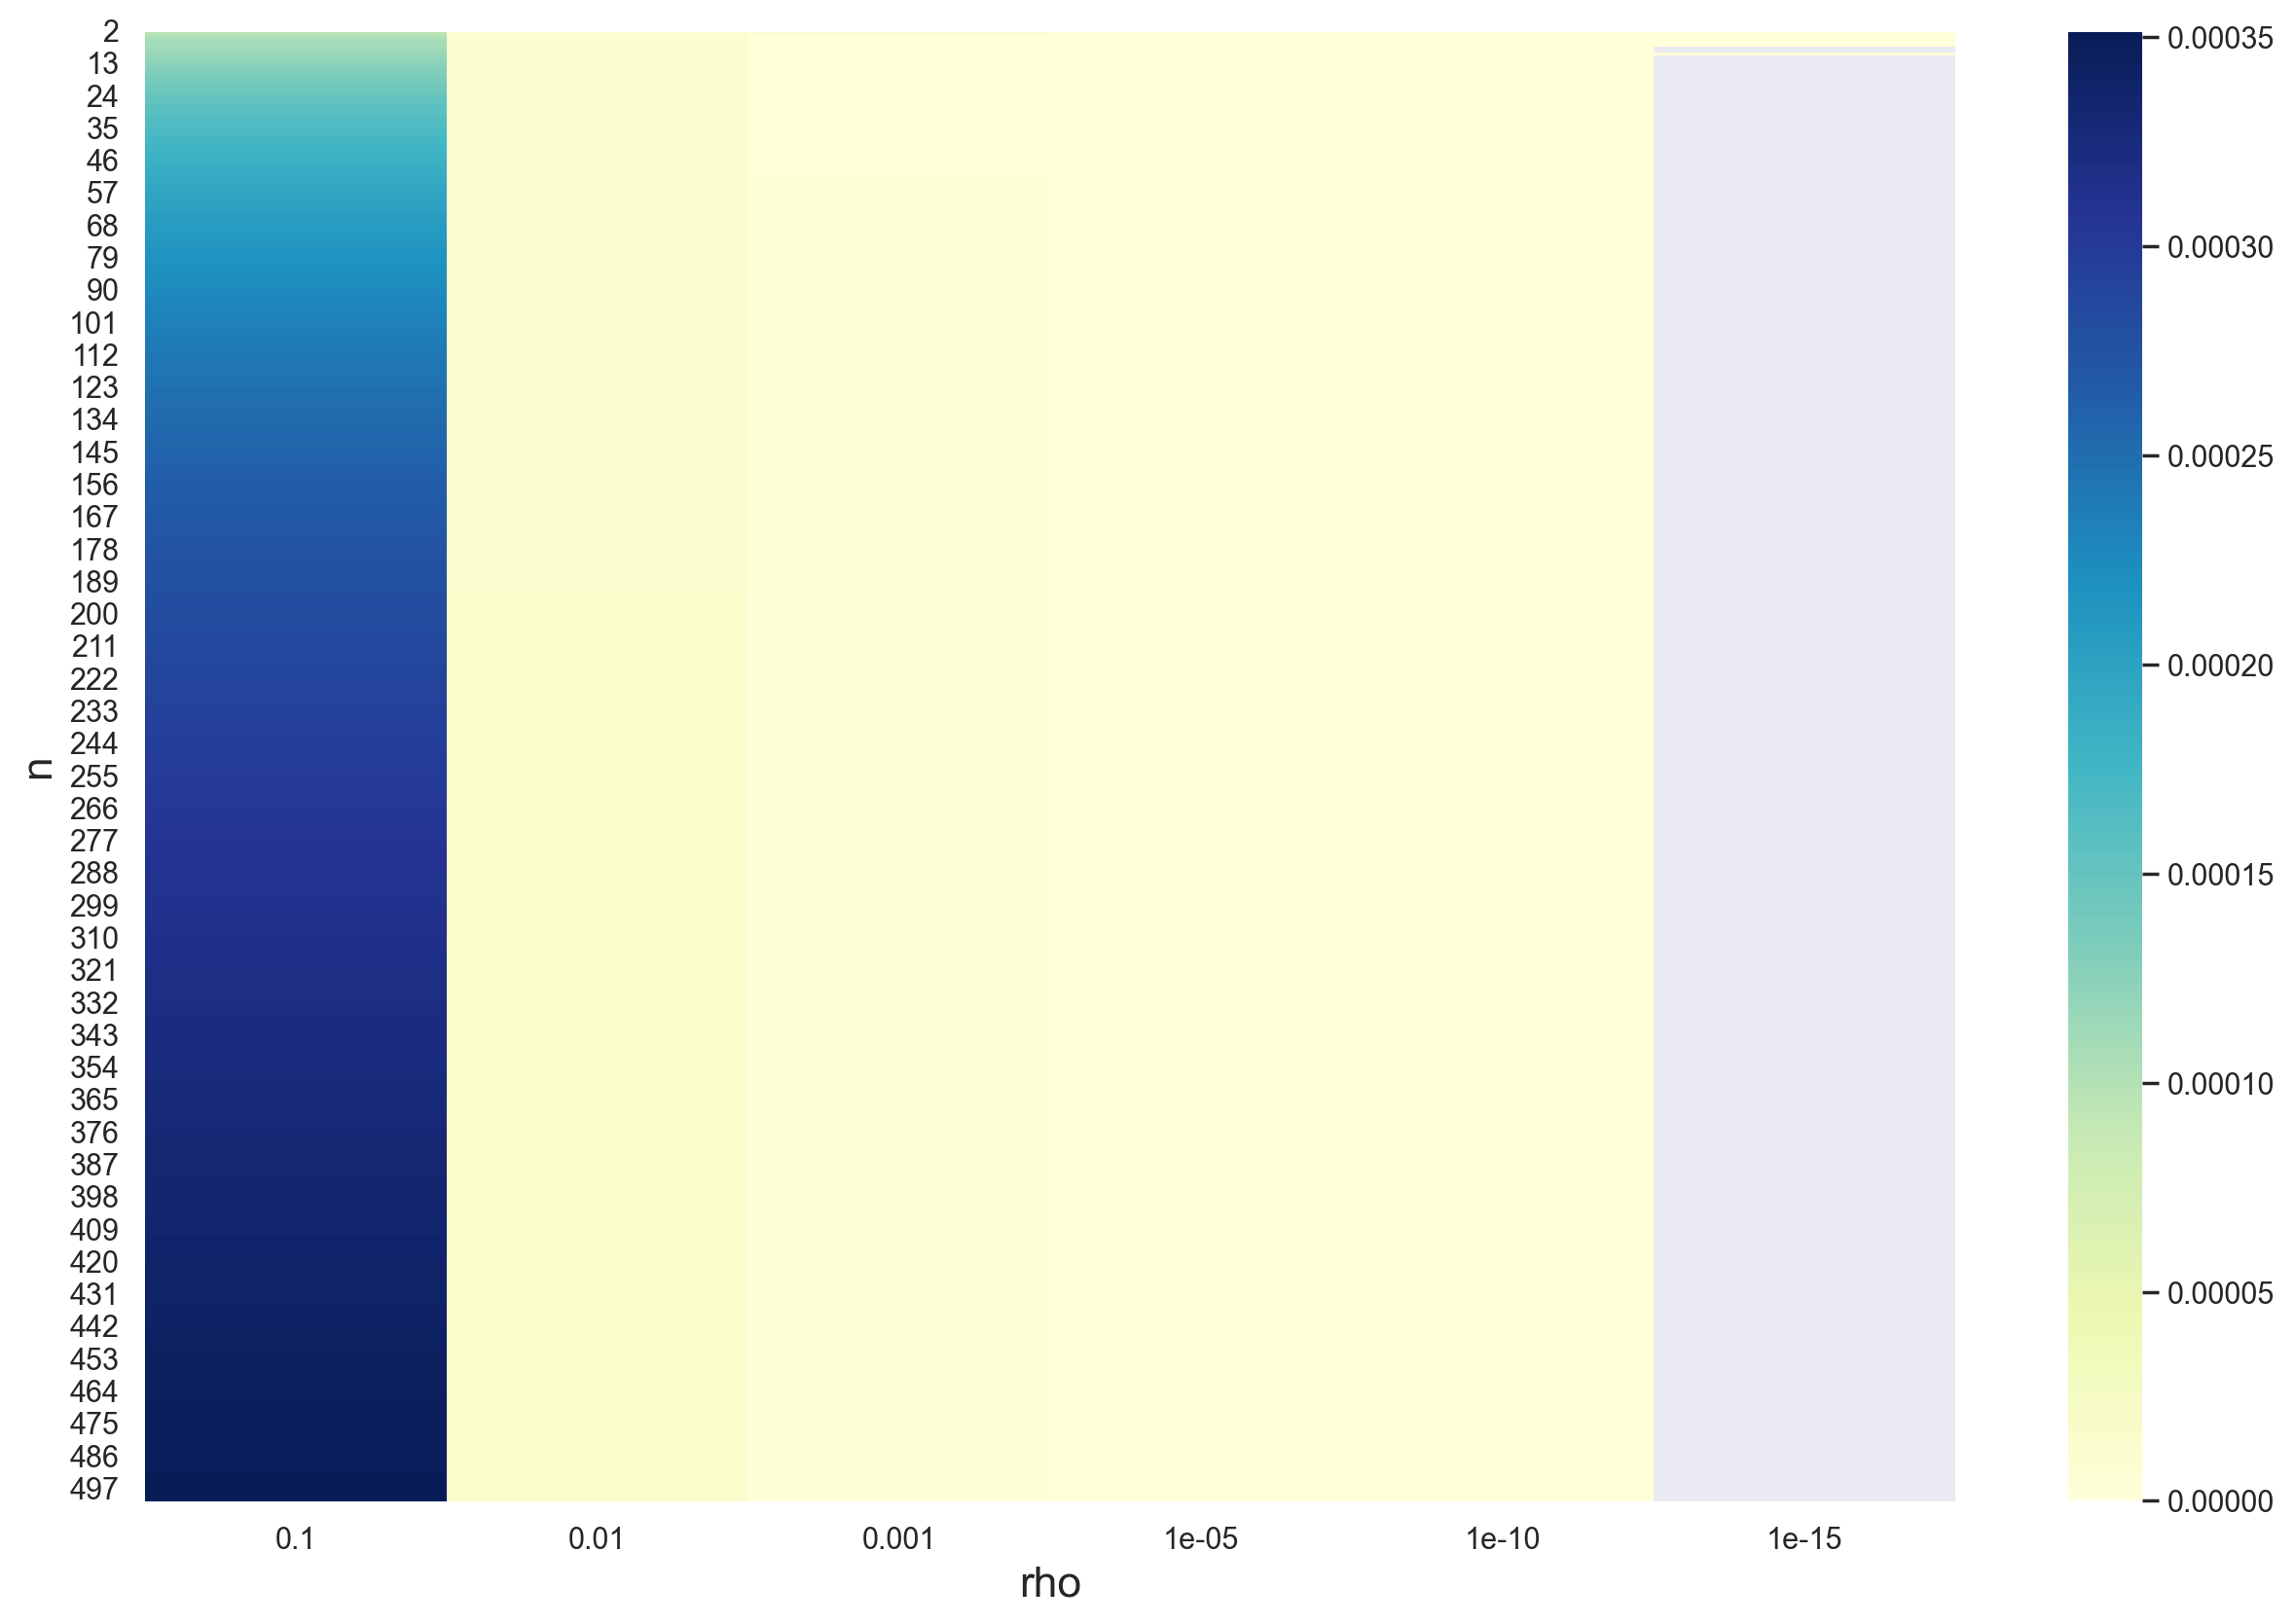

In [112]:
show_heatmap(df_errors2, xlabel='rho', ylabel='n', annot=False)

###### Wykres czas√≥w w skali logarytmicznej

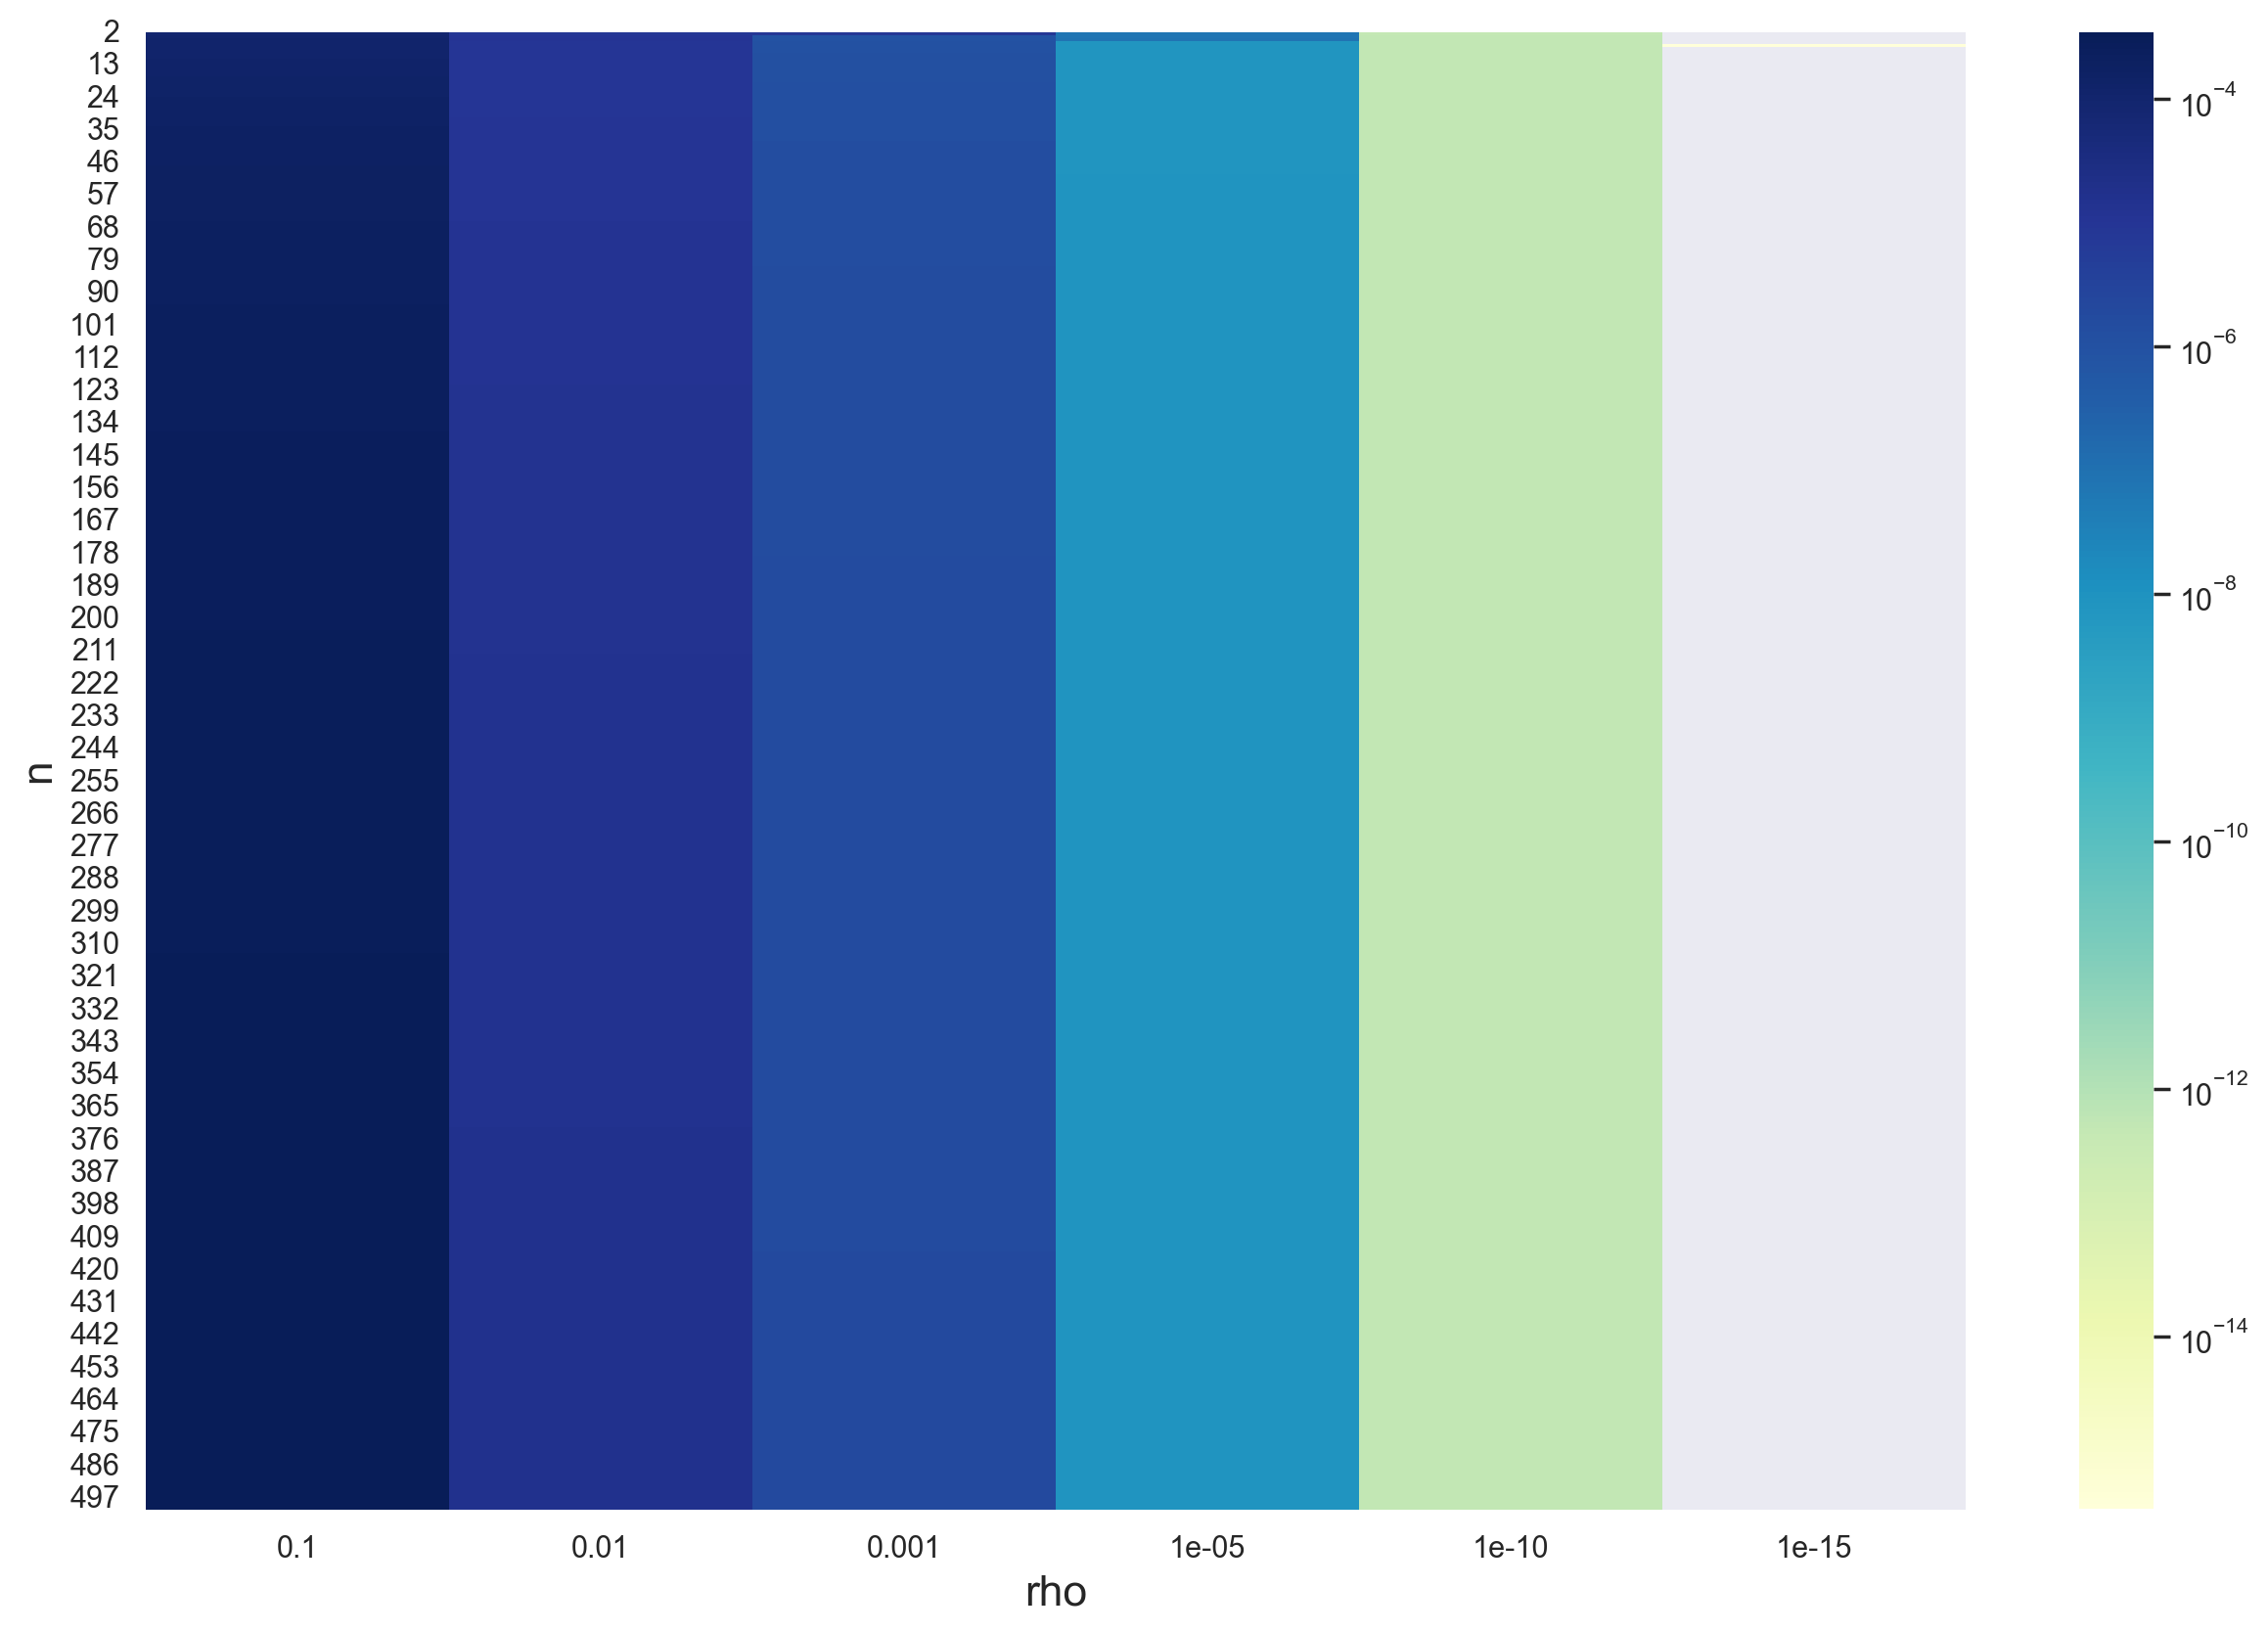

In [116]:
show_heatmap(df_errors2, xlabel='rho', ylabel='n', annot=False, norm=LogNorm())

# Zadanie 2

## Opis zadania

DowolnƒÖ metodƒÖ znajd≈∫ promie≈Ñ spektralny macierzy iteracji (dla r√≥≈ºnych rozmiar√≥w uk≈Çadu ‚Äì 
takich, dla kt√≥rych znajdowane by≈Çy rozwiƒÖzania uk≈Çadu). Sprawd≈∫, czy spe≈Çnione sƒÖ za≈Ço≈ºenia o 
zbie≈ºno≈õci metody dla zadanego uk≈Çadu.

Opisz metodƒô znajdowania promienia spektralnego.

*Promie≈Ñ spektralny macierzy - warto≈õƒá w≈Çasna o maksymalnej warto≈õci bezwzglƒôdnej.*

## Spos√≥b wyznaczania promienia spektralnego macierzy iteracji $M$

1) Mamy do rozwiƒÖzania:

$A \cdot x = b$

gdzie $A$ jest macierzƒÖ $n \times n$,
- $x$ ‚Äì wektor $n$ niewiadomych,
- $b$ ‚Äì wektor danych (≈∫r√≥de≈Ç).

<br>

2) Zapisujemy macierz $A$ w postaci sumy macierzy:

$A = B + R$

gdzie:
- $B$ ‚Äì macierz dla, kt√≥rej ≈Çatwo wyznaczyƒá $B^{-1}$ (np. mo≈ºe to byƒá macierz diagonalna),
- $R$ ‚Äì pozosta≈Ça czƒô≈õƒá macierzy $A$.

Otrzymujemy:

$A \cdot x = (B + R) \cdot x = b$

$B \cdot x = ‚àíR \cdot x + b$

$B \cdot x = ‚àí(A ‚àí B) \cdot x + b$

<br>

3) Wyznaczone w poprzednim punkcie r√≥wnanie mo≈ºemy zapisaƒá w postaci iteracyjnej:

$B \cdot x^{(t + 1)} = -(A - B) \cdot x^{(t)} + b$

$x^{(t + 1)} = -B^{-1} \cdot (A - B) \cdot x^{(t)} + B^{-1} \cdot b$

$x^{(t + 1)} = I - B^{-1} \cdot A \cdot x^{(t)} + B^{-1} \cdot b$

$ I - B^{-1} \cdot A $ jest macierzƒÖ iteracji $M$

4) Promie≈Ñ spektralny wyznaczam jako warto≈õƒá w≈ÇasnƒÖ o maksymalnej warto≈õci bezwzglƒôdnej. Do wyznaczenia warto≈õci w≈Çasnych wykorzystujƒô funkcjƒô `linalg.eig` z biblioteki `numpy`.

### Przyk≈Çad

In [138]:
n = 5
A = create_A_matrix(n)
B = np.diagflat(np.diag(A))
I = np.eye(n)

M = I - np.linalg.inv(B) @ A
M

array([[ 0.        , -0.09090909,  0.06060606, -0.04545455,  0.03636364],
       [-0.09090909,  0.        ,  0.06060606, -0.04545455,  0.03636364],
       [ 0.        , -0.06060606,  0.        , -0.04545455,  0.03636364],
       [ 0.        ,  0.        , -0.04545455,  0.        ,  0.03636364],
       [ 0.        ,  0.        ,  0.        , -0.03636364,  0.        ]])

In [136]:
np.linalg.eigvals(M)

array([ 0.09090909+0.j        , -0.05484043+0.03565469j,
       -0.05484043-0.03565469j,  0.00938588+0.02492733j,
        0.00938588-0.02492733j])

In [137]:
max(abs(eig_vals))

0.09090909090909104

## Rezultaty

##### Pomocnicza funkcja, s≈Çu≈ºƒÖca do wyznaczania promienia spektralnego macierzy iteracji dla zadanego $n$

In [140]:
def spectral_radius(n):
    A = create_A_matrix(n)
    B = np.diagflat(np.diag(A))
    I = np.eye(n)

    M = I - np.linalg.inv(B) @ A
    return max(abs(np.linalg.eigvals(M)))

##### Wyniki

In [144]:
min_n = 2
max_n = 500
sr_list = list(map(spectral_radius, range(min_n, max_n + 1)))

Widzimy, ≈ºe wszystkie promienie spektralne spe≈ÇniajƒÖ warunek zbie≈ºno≈õci.

In [145]:
all(p < 1 for p in sr_list)

True

In [154]:
df_sr = pd.DataFrame(sr_list, index=list(range(min_n, max_n + 1)), columns=['promie≈Ñ spektralny'])
df_sr

promie≈Ñ spektralny
2              0.090909
3              0.090909
4              0.090909
5              0.090909
6              0.090909
..                  ...
496            0.090909
497            0.090909
498            0.090909
499            0.090909
500            0.090909

[499 rows x 1 columns]

In [158]:
interval = 10
df_sr_part = df_sr[interval-min_n::interval]
df_sr_part.to_excel('spectral-radius.xlsx')
df_sr_part

promie≈Ñ spektralny
10             0.090909
20             0.090909
30             0.090909
40             0.090909
50             0.090909
60             0.090909
70             0.090909
80             0.090909
90             0.090909
100            0.090909
110            0.090909
120            0.090909
130            0.090909
140            0.090909
150            0.090909
160            0.090909
170            0.090909
180            0.090909
190            0.090909
200            0.090909
210            0.090909
220            0.090909
230            0.090909
240            0.090909
250            0.090909
260            0.090909
270            0.090909
280            0.090909
290            0.090909
300            0.090909
310            0.090909
320            0.090909
330            0.090909
340            0.090909
350            0.090909
360            0.090909
370            0.090909
380            0.090909
390            0.090909
400            0.090909
410            0.090909
420            0.090909
430            0.090909
440            0.090909
450            0.090909
460            0.090909
470            0.090909
480            0.090909
490            0.090909
500            0.090909